# **CORONARY HEART DISEASE(CHD) PREDICTION**

**About the dataset:** <br>
    *The Framingham Coronary Heart Disease (CHD) dataset is a dataset that contains information about various risk factors for coronary heart disease. It is named after the Framingham Heart Study, a long-term cardiovascular study conducted in Framingham, Massachusetts.
    The dataset includes variables such as age, gender, education level, smoking status, blood pressure, cholesterol levels, body mass index (BMI), and other factors that are known to be associated with the risk of developing coronary heart disease.
    The goal of using this dataset is to analyze and predict the likelihood of developing coronary heart disease within a 10-year period based on the given risk factors.
    The dataset consists of 4,240 records and 16 columns, including the target variable "TenYearCHD" which indicates whether an individual developed coronary heart disease within 10 years (1) or not (0).
    It is important to note that the dataset may contain missing values and requires preprocessing steps such as data cleaning, handling missing values, and feature engineering before using it for analysis or modeling.*

### **Objective:** 
#### To build a classification model that predicts heart disease in a subject. <br>(NB. The target column to predict is 'TenYearCHD' where CHD = Coronary heart disease) 

### IMPORTING LIBRARIES

In [14]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Ensembling
from mlxtend.classifier import StackingCVClassifier

### 1. LOADING DATASET

In [16]:
df = pd.read_csv("framingham.csv")

In [17]:
df.shape

(4240, 16)

In [19]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.000,0,0.000,0.000,0,0,0,195.000,106.000,70.000,26.970,80.000,77.000,0
1,0,46,2.000,0,0.000,0.000,0,0,0,250.000,121.000,81.000,28.730,95.000,76.000,0
2,1,48,1.000,1,20.000,0.000,0,0,0,245.000,127.500,80.000,25.340,75.000,70.000,0
3,0,61,3.000,1,30.000,0.000,0,1,0,225.000,150.000,95.000,28.580,65.000,103.000,1
4,0,46,3.000,1,23.000,0.000,0,0,0,285.000,130.000,84.000,23.100,85.000,85.000,0
5,0,43,2.000,0,0.000,0.000,0,1,0,228.000,180.000,110.000,30.300,77.000,99.000,0
6,0,63,1.000,0,0.000,0.000,0,0,0,205.000,138.000,71.000,33.110,60.000,85.000,1
7,0,45,2.000,1,20.000,0.000,0,0,0,313.000,100.000,71.000,21.680,79.000,78.000,0
8,1,52,1.000,0,0.000,0.000,0,1,0,260.000,141.500,89.000,26.360,76.000,79.000,0
9,1,43,1.000,1,30.000,0.000,0,1,0,225.000,162.000,107.000,23.610,93.000,88.000,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


### 2. DATA CLEANING

In [21]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [23]:
(df['glucose'].mode())[0]

75.0

In [26]:
df.fillna({"glucose":(df["glucose"].mode())[0]}, inplace=True)

In [27]:
df.dropna(inplace=True)
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

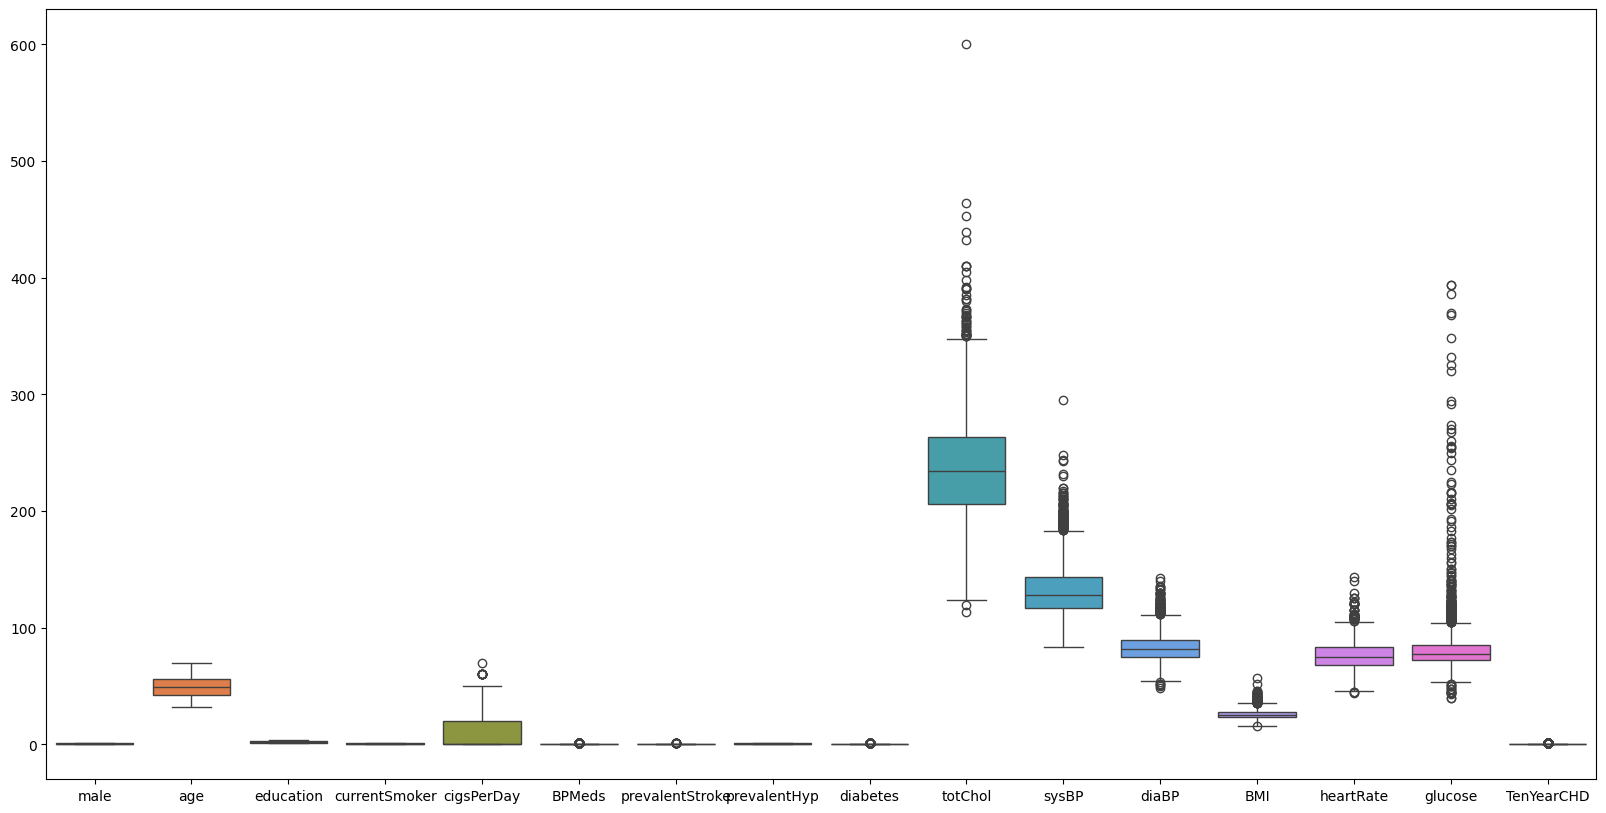

In [28]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df)
plt.show()

We detected Removable Outliers in `totChol` and `sysBP` columns of our dataset.

In [29]:
df['totChol'].max()

600.0

In [31]:
df['sysBP'].max()

295.0

In [32]:
df = df[df['totChol']<600.0]
df = df[df['sysBP']<295.0]
df.shape

(3987, 16)

*So our datafront is now free from missing values, outliers and duplicate values*

### 3. EXPLORATORY DATA ANALYSIS (EDA)

In [33]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3987.000,3987.000,3987.000,3987.000,3987.000,3987.000,3987.000,3987.000,3987.000,3987.000,3987.000,3987.000,3987.000,3987.000,3987.000,3987.000
mean,0.433,49.470,1.983,0.491,9.028,0.029,0.006,0.309,0.025,236.502,132.177,82.850,25.769,75.869,81.272,0.149
std,0.496,8.531,1.021,0.500,11.918,0.169,0.074,0.462,0.156,43.653,21.793,11.855,4.075,12.086,22.955,0.356
min,0.000,32.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,113.000,83.500,48.000,15.540,44.000,40.000,0.000
25%,0.000,42.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,206.000,117.000,75.000,23.060,68.000,72.000,0.000
50%,0.000,49.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,234.000,128.000,82.000,25.380,75.000,77.000,0.000
75%,1.000,56.000,3.000,1.000,20.000,0.000,0.000,1.000,0.000,263.000,143.000,89.500,27.990,83.000,85.000,0.000
max,1.000,70.000,4.000,1.000,70.000,1.000,1.000,1.000,1.000,464.000,248.000,142.500,56.800,143.000,394.000,1.000


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000,-0.022,0.013,0.200,0.325,-0.050,-0.004,0.008,0.018,-0.067,-0.032,0.060,0.080,-0.116,0.009,0.092
age,-0.022,1.000,-0.161,-0.213,-0.190,0.129,0.045,0.304,0.105,0.271,0.389,0.205,0.133,-0.009,0.116,0.229
education,0.013,-0.161,1.000,0.018,0.006,-0.010,-0.029,-0.081,-0.035,-0.023,-0.127,-0.062,-0.136,-0.058,-0.031,-0.054
currentSmoker,0.200,-0.213,0.018,1.000,0.771,-0.049,-0.033,-0.105,-0.039,-0.047,-0.130,-0.109,-0.164,0.053,-0.051,0.023
cigsPerDay,0.325,-0.190,0.006,0.771,1.000,-0.044,-0.034,-0.066,-0.035,-0.025,-0.087,-0.050,-0.087,0.068,-0.051,0.060
BPMeds,-0.050,0.129,-0.010,-0.049,-0.044,1.000,0.127,0.260,0.048,0.087,0.263,0.197,0.103,0.016,0.054,0.090
prevalentStroke,-0.004,0.045,-0.029,-0.033,-0.034,0.127,1.000,0.067,0.010,0.008,0.056,0.050,0.032,-0.012,0.017,0.045
prevalentHyp,0.008,0.304,-0.081,-0.105,-0.066,0.260,0.067,1.000,0.073,0.163,0.696,0.615,0.304,0.151,0.084,0.175
diabetes,0.018,0.105,-0.035,-0.039,-0.035,0.048,0.010,0.073,1.000,0.032,0.101,0.050,0.082,0.052,0.609,0.086
totChol,-0.067,0.271,-0.023,-0.047,-0.025,0.087,0.008,0.163,0.032,1.000,0.215,0.171,0.123,0.089,0.044,0.078


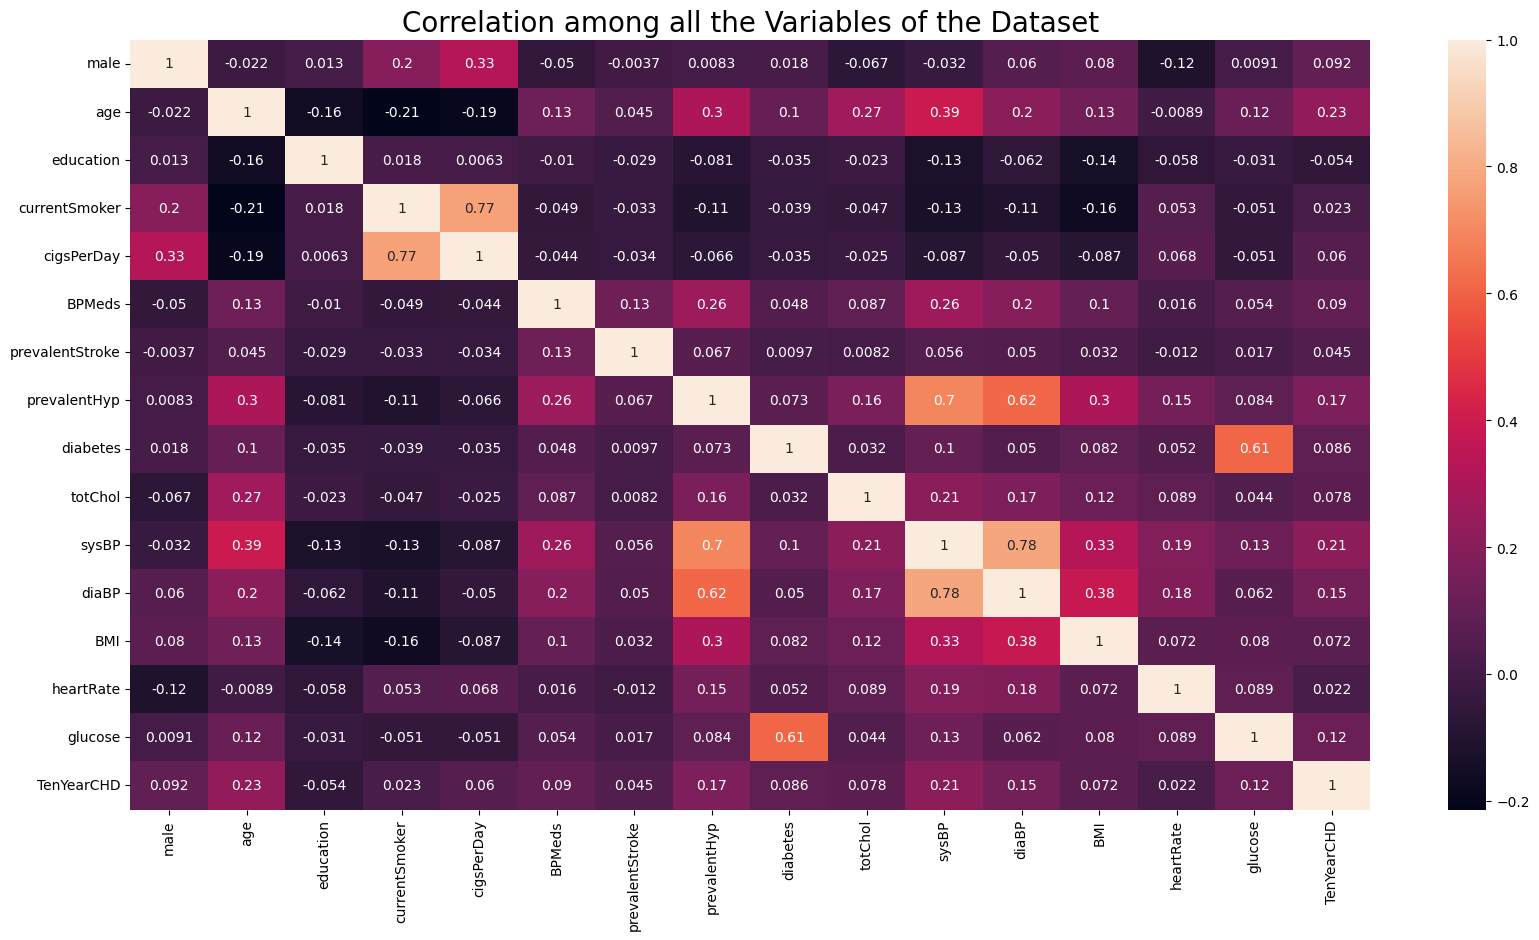

In [34]:
#Checking relationship between variables
cor=df.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

We notice that the correlation coefficient between `education` and and target variable `TenYearCHD` is very low and actually negative.

#### 3.1 Univariate Analysis

##### Categorical Features

In [35]:
categorical_features = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [37]:
for feature in categorical_features:
    print(feature,':')
    print(df[feature].value_counts())
    print("-----------------")

male :
male
0    2259
1    1728
Name: count, dtype: int64
-----------------
education :
education
1.000    1653
2.000    1209
3.000     666
4.000     459
Name: count, dtype: int64
-----------------
currentSmoker :
currentSmoker
0    2028
1    1959
Name: count, dtype: int64
-----------------
BPMeds :
BPMeds
0.000    3870
1.000     117
Name: count, dtype: int64
-----------------
prevalentStroke :
prevalentStroke
0    3965
1      22
Name: count, dtype: int64
-----------------
prevalentHyp :
prevalentHyp
0    2754
1    1233
Name: count, dtype: int64
-----------------
diabetes :
diabetes
0    3887
1     100
Name: count, dtype: int64
-----------------


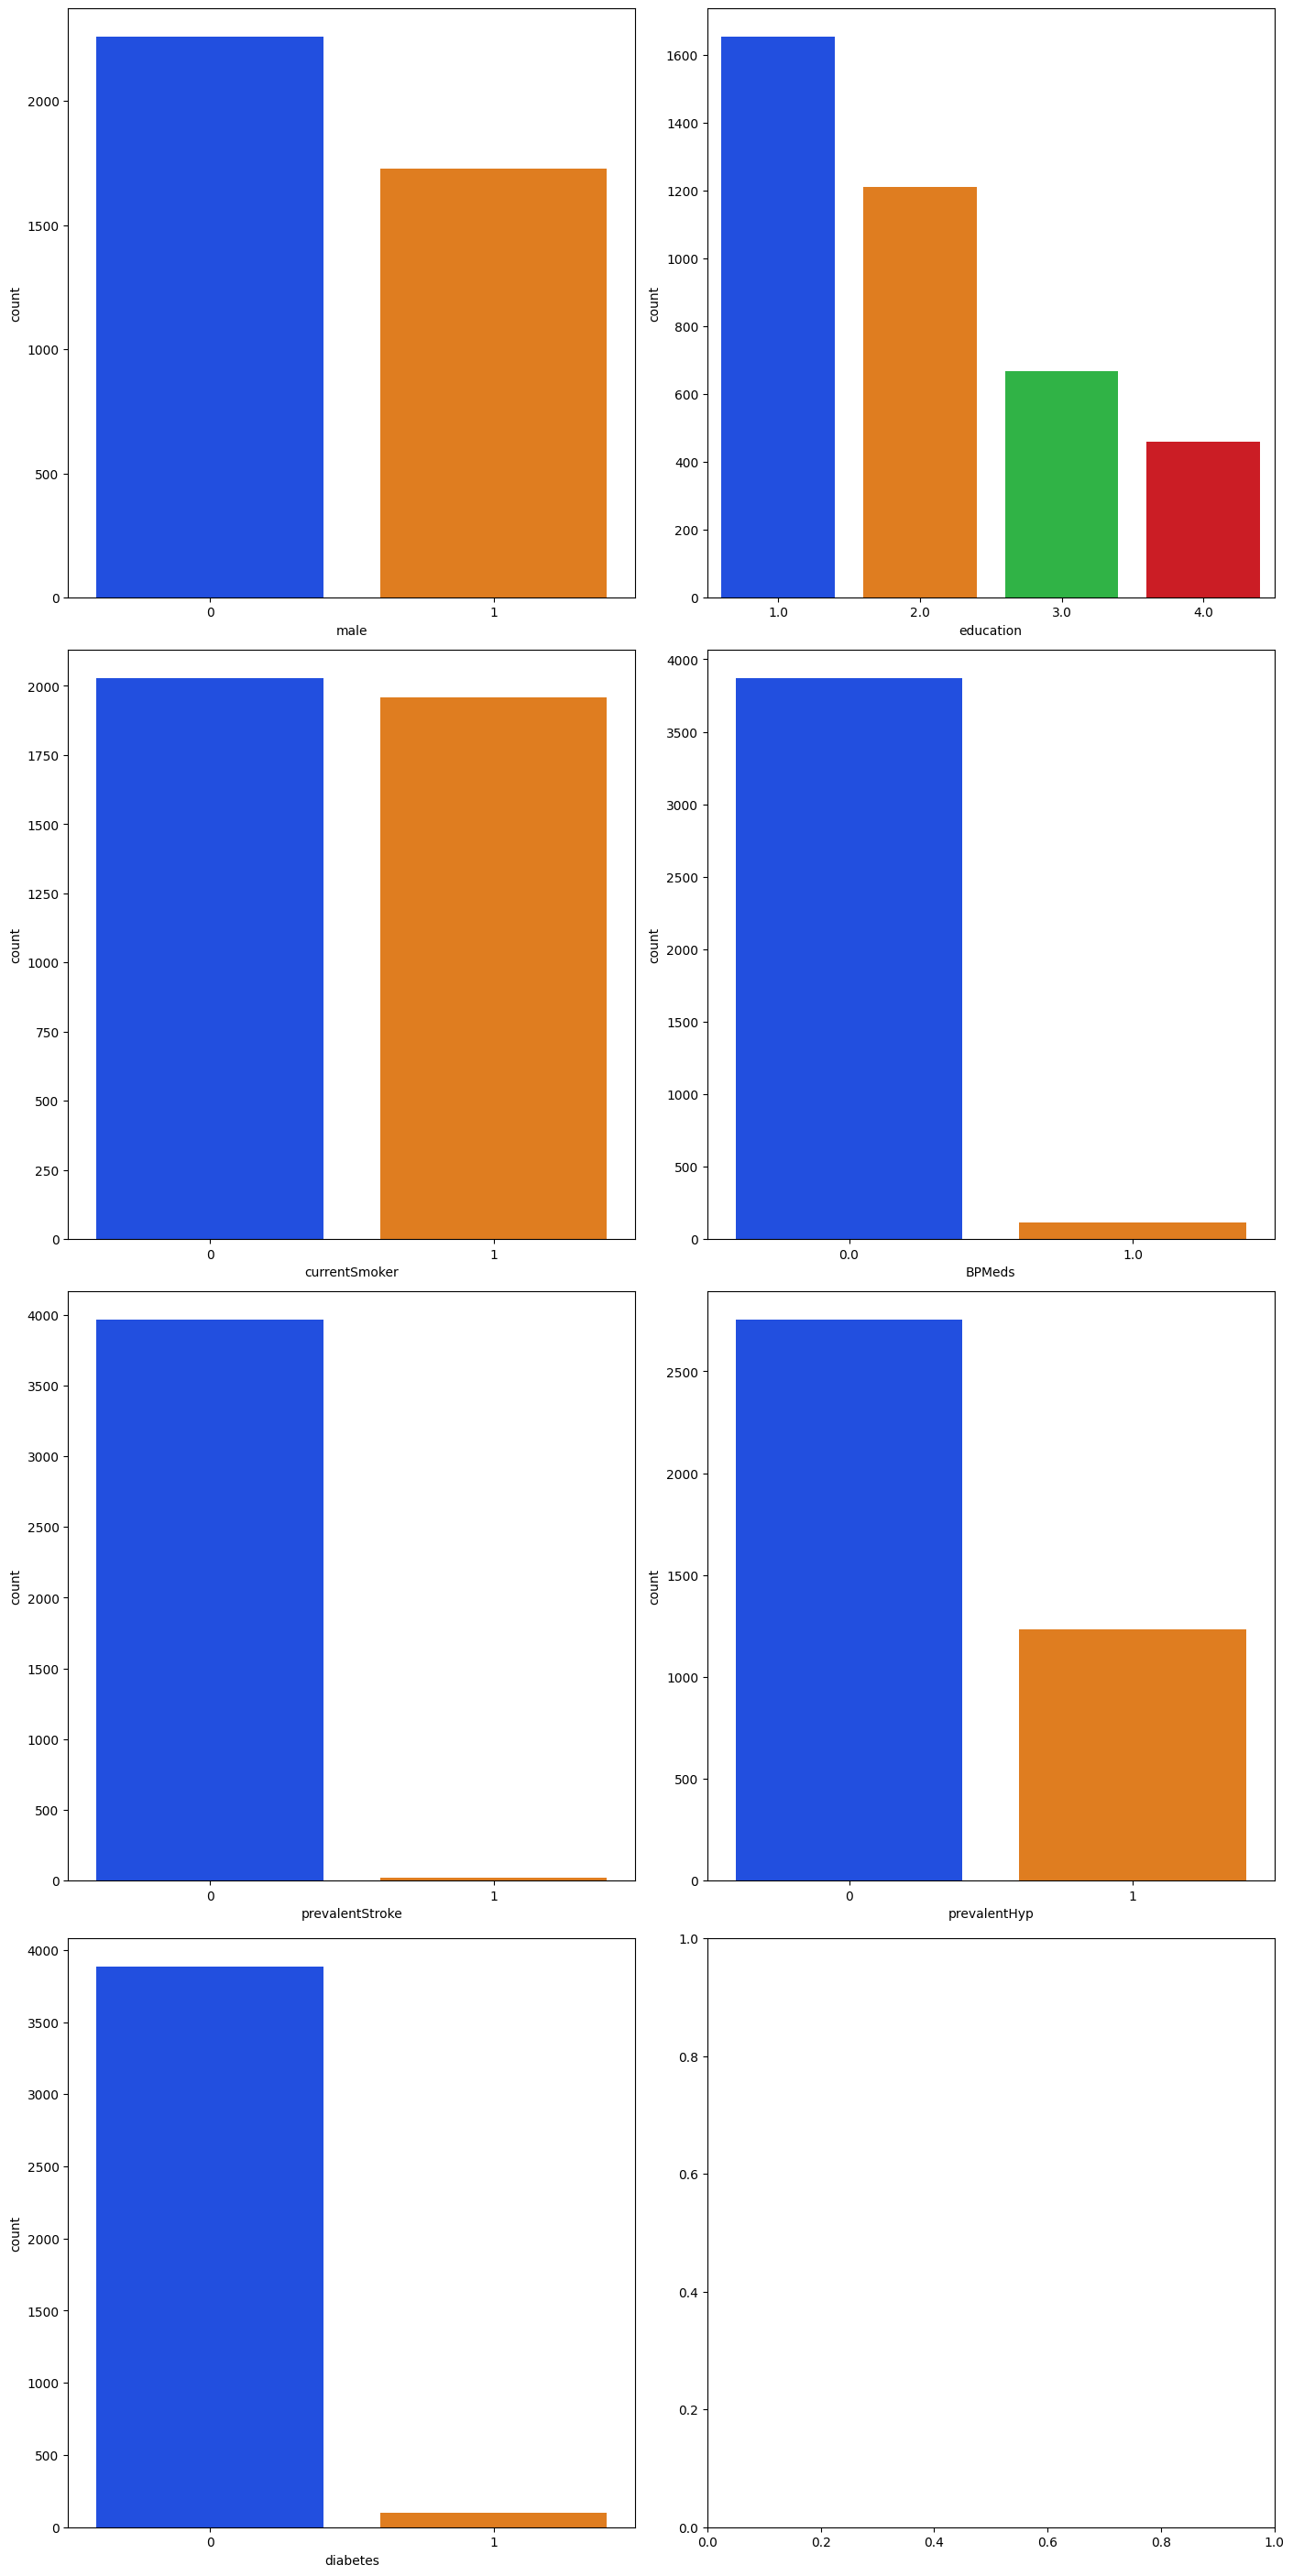

In [48]:
num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, hue=var, data=df, ax=axs[row][pos], palette='bright', legend=False)

We notice that among the categorical features:
* `BPmeds`, `prevalentStroke` and `diabetes` are highly imbalanced.
* There are four levels of `education` whereas the rest categorical features are all binary
* The number of Smokers and non-Smokers in `currentSmoker` is almost the same

#### Numerical Features

<Figure size 1800x1000 with 0 Axes>

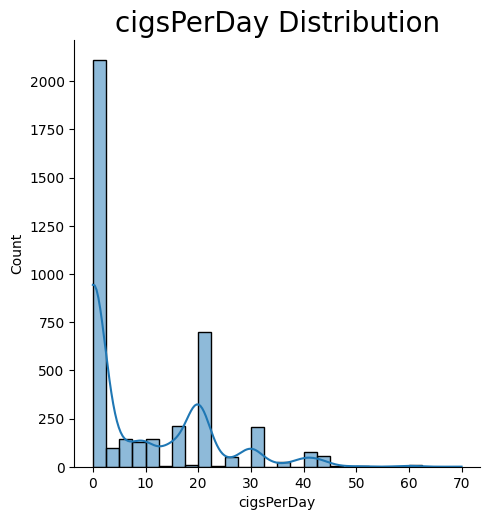

<Figure size 1800x1000 with 0 Axes>

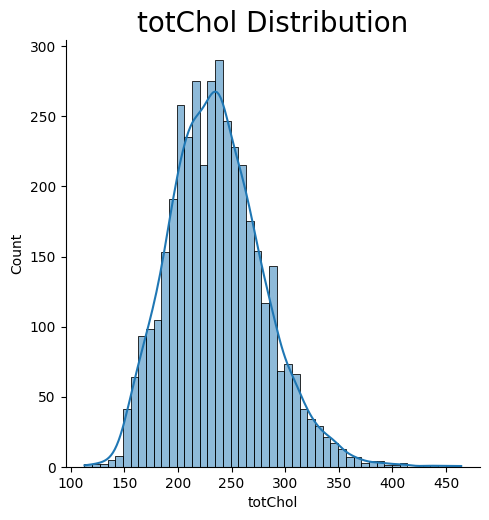

<Figure size 1800x1000 with 0 Axes>

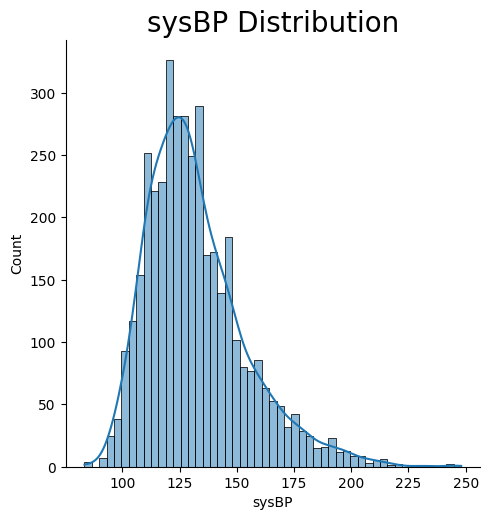

<Figure size 1800x1000 with 0 Axes>

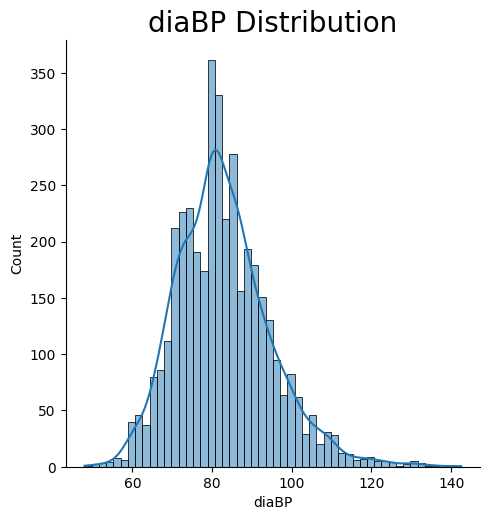

<Figure size 1800x1000 with 0 Axes>

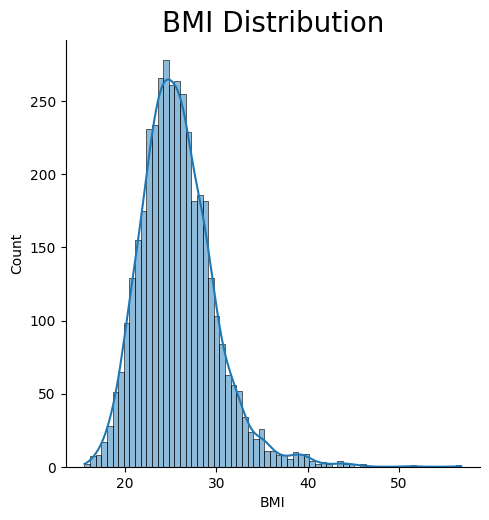

<Figure size 1800x1000 with 0 Axes>

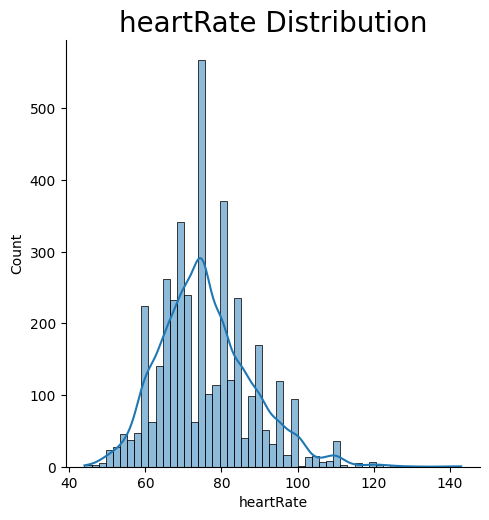

<Figure size 1800x1000 with 0 Axes>

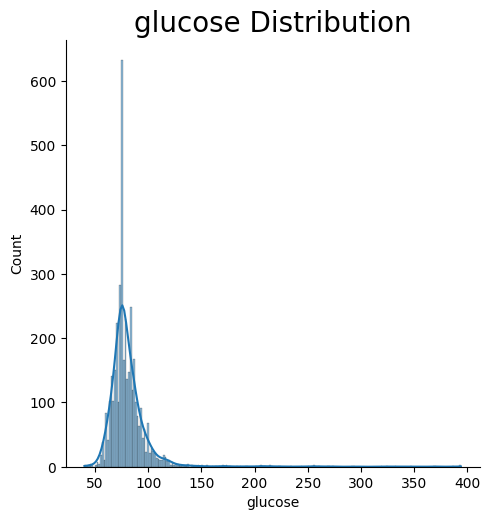

In [50]:
numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.displot(df[feature], kde=True)  # use displot instead of distplot
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

Among the numerical features:
* `totChol`, `sysBP`, `diaBP`and `BMI` has an uniform distribution and the rest are unevenly distributed
* `cigsPerDay` has a highly uneven distribution with the most data present in 0 
* `cigsPerDay` and `sysBP` shows quite a bit and slight right skewness respectively.

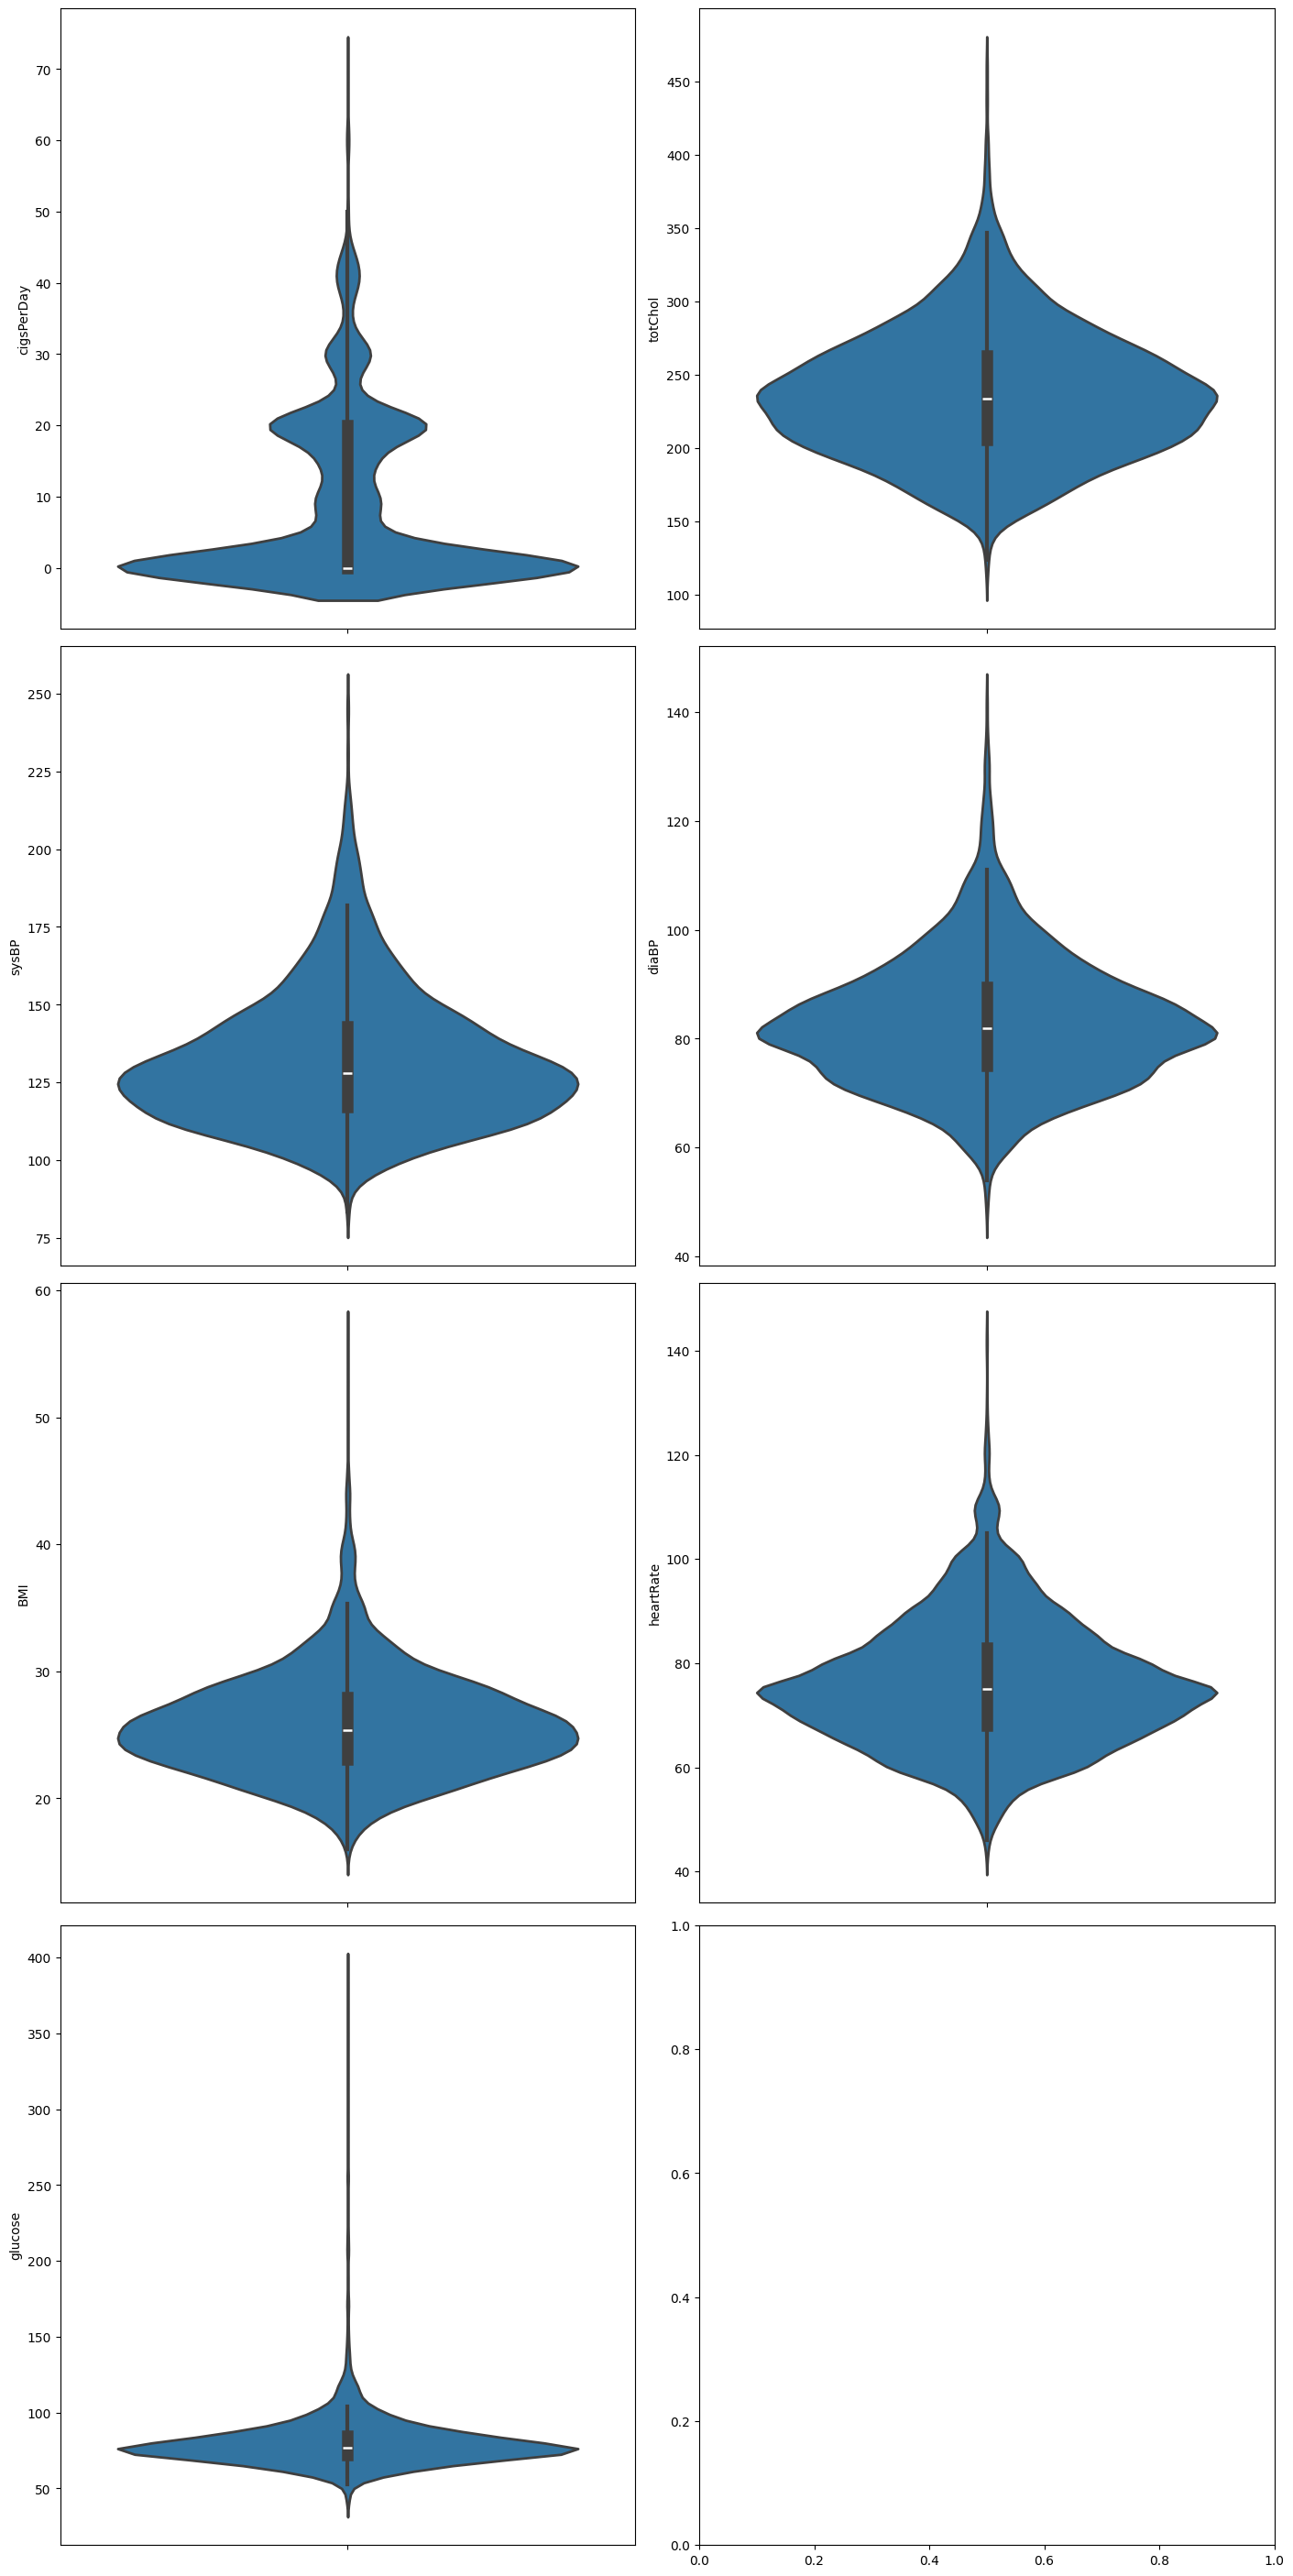

In [51]:
num_plots = len(numeric_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
color = ['m', 'g', 'b', 'r', 'y', 'v', 'o']
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(numeric_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.violinplot(y=var, data=df, ax=axs[row][pos], linewidth=2)

For the same numerical features:
* `cigsPerDay` has uneven distribution although most of the data is concentrated on `0`
* The majority portions of the following columns lie in the range: 
    * `totChol`: 150 to 300
    * `sysBP`: 100 to 150
    * `diaBP`: 60 to 100
    * `BMI`: 20 to 30
    * `heartRate`: 50 to 100
    * `glucose`: 50 to 150

#### Target Variable

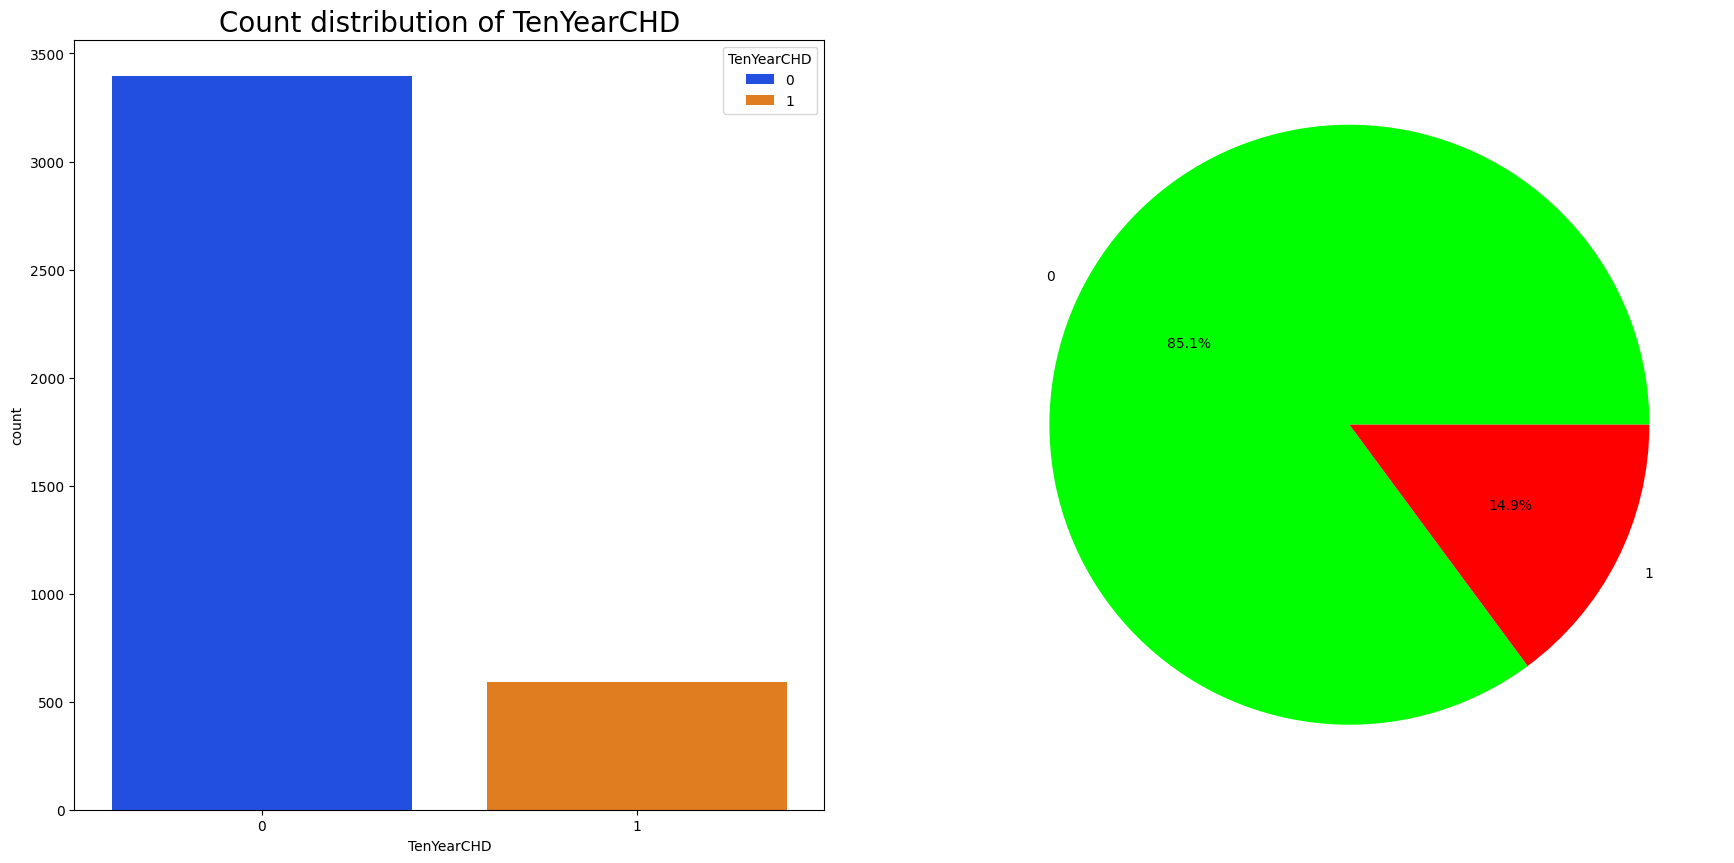

In [54]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", hue="TenYearCHD", palette="bright", data=df)
plt.title("Count distribution of TenYearCHD", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(df["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["lime","red"])
plt.show()

The distribution is highly imbalanced. As in, the number of negative cases outweigh the number of positive cases. This would lead to class imbalance problem while fitting our models. Therefore, this problem needs to be addressed and taken care of.

#### 3.2. Bivariate Analysis

##### Relationship between education and cigsPerDay

In [55]:
#Grouping education and cigsPerDay

graph_1 = df.groupby("education", as_index=False).cigsPerDay.mean()

(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 [Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7'),
  Text(0, 8.0, '8'),
  Text(0, 9.0, '9'),
  Text(0, 10.0, '10'),
  Text(0, 11.0, '11'),
  Text(0, 12.0, '12'),
  Text(0, 13.0, '13')])

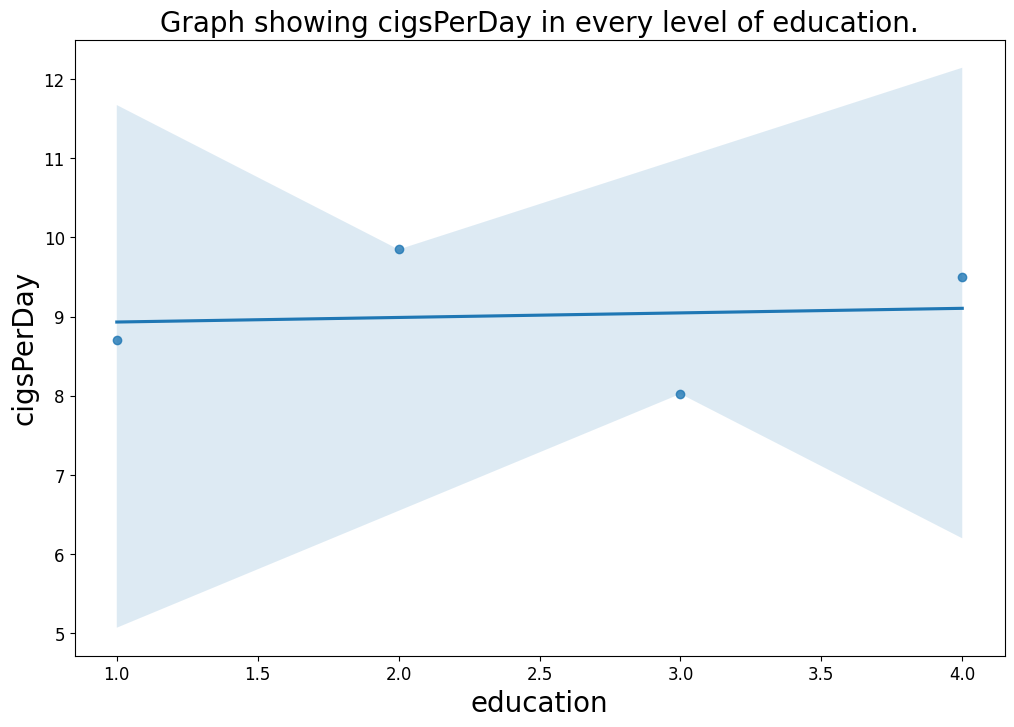

In [56]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_1["education"], y=graph_1["cigsPerDay"])
plt.title("Graph showing cigsPerDay in every level of education.", size=20)
plt.xlabel("education", size=20)
plt.ylabel("cigsPerDay", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* There is no linear relationship observed.
* Level 3 `education` shows the lowest mean.

#### Which gender has more risk of coronary heart disease CHD

In [58]:
graph_2 = df.groupby("male", as_index=False).TenYearCHD.sum()

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300'),
  Text(0, 350.0, '350')])

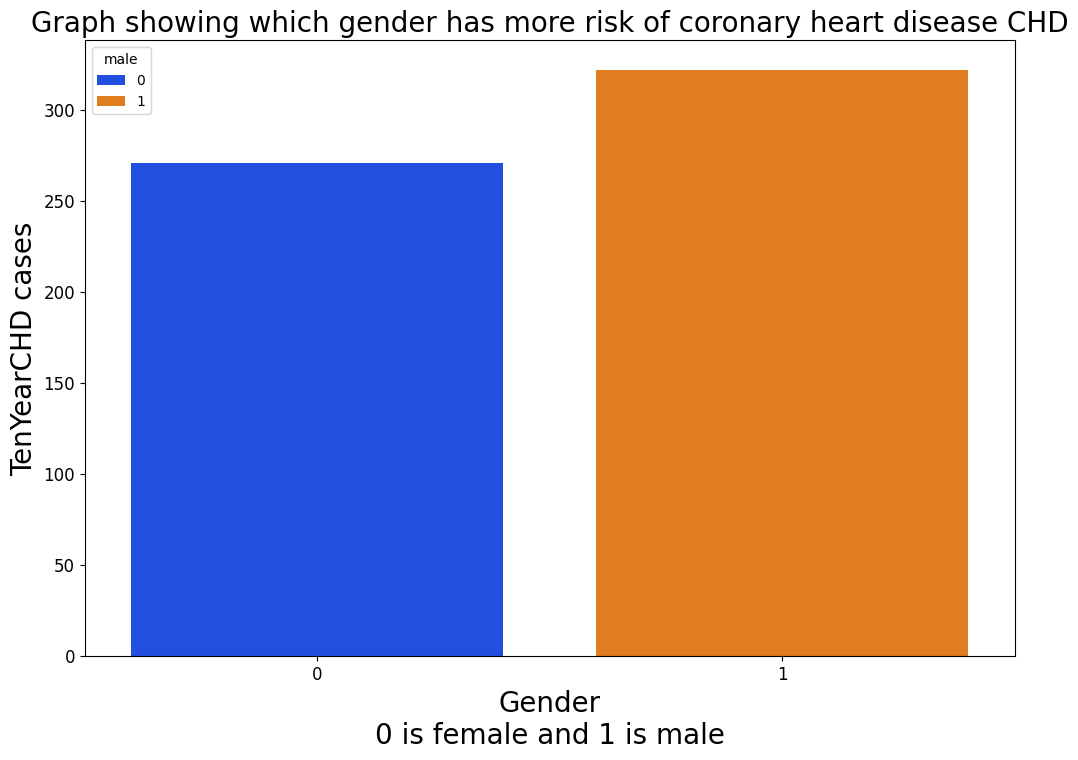

In [60]:
#Ploting the above values

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_2["male"], y=graph_2["TenYearCHD"], hue=graph_2["male"], palette = 'bright')
plt.title("Graph showing which gender has more risk of coronary heart disease CHD", size=20)
plt.xlabel("Gender\n0 is female and 1 is male",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

Here we notice that `males` have more chances of risk of CHD `TenYearCHD`

#### Which age group has more smokers.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140')])

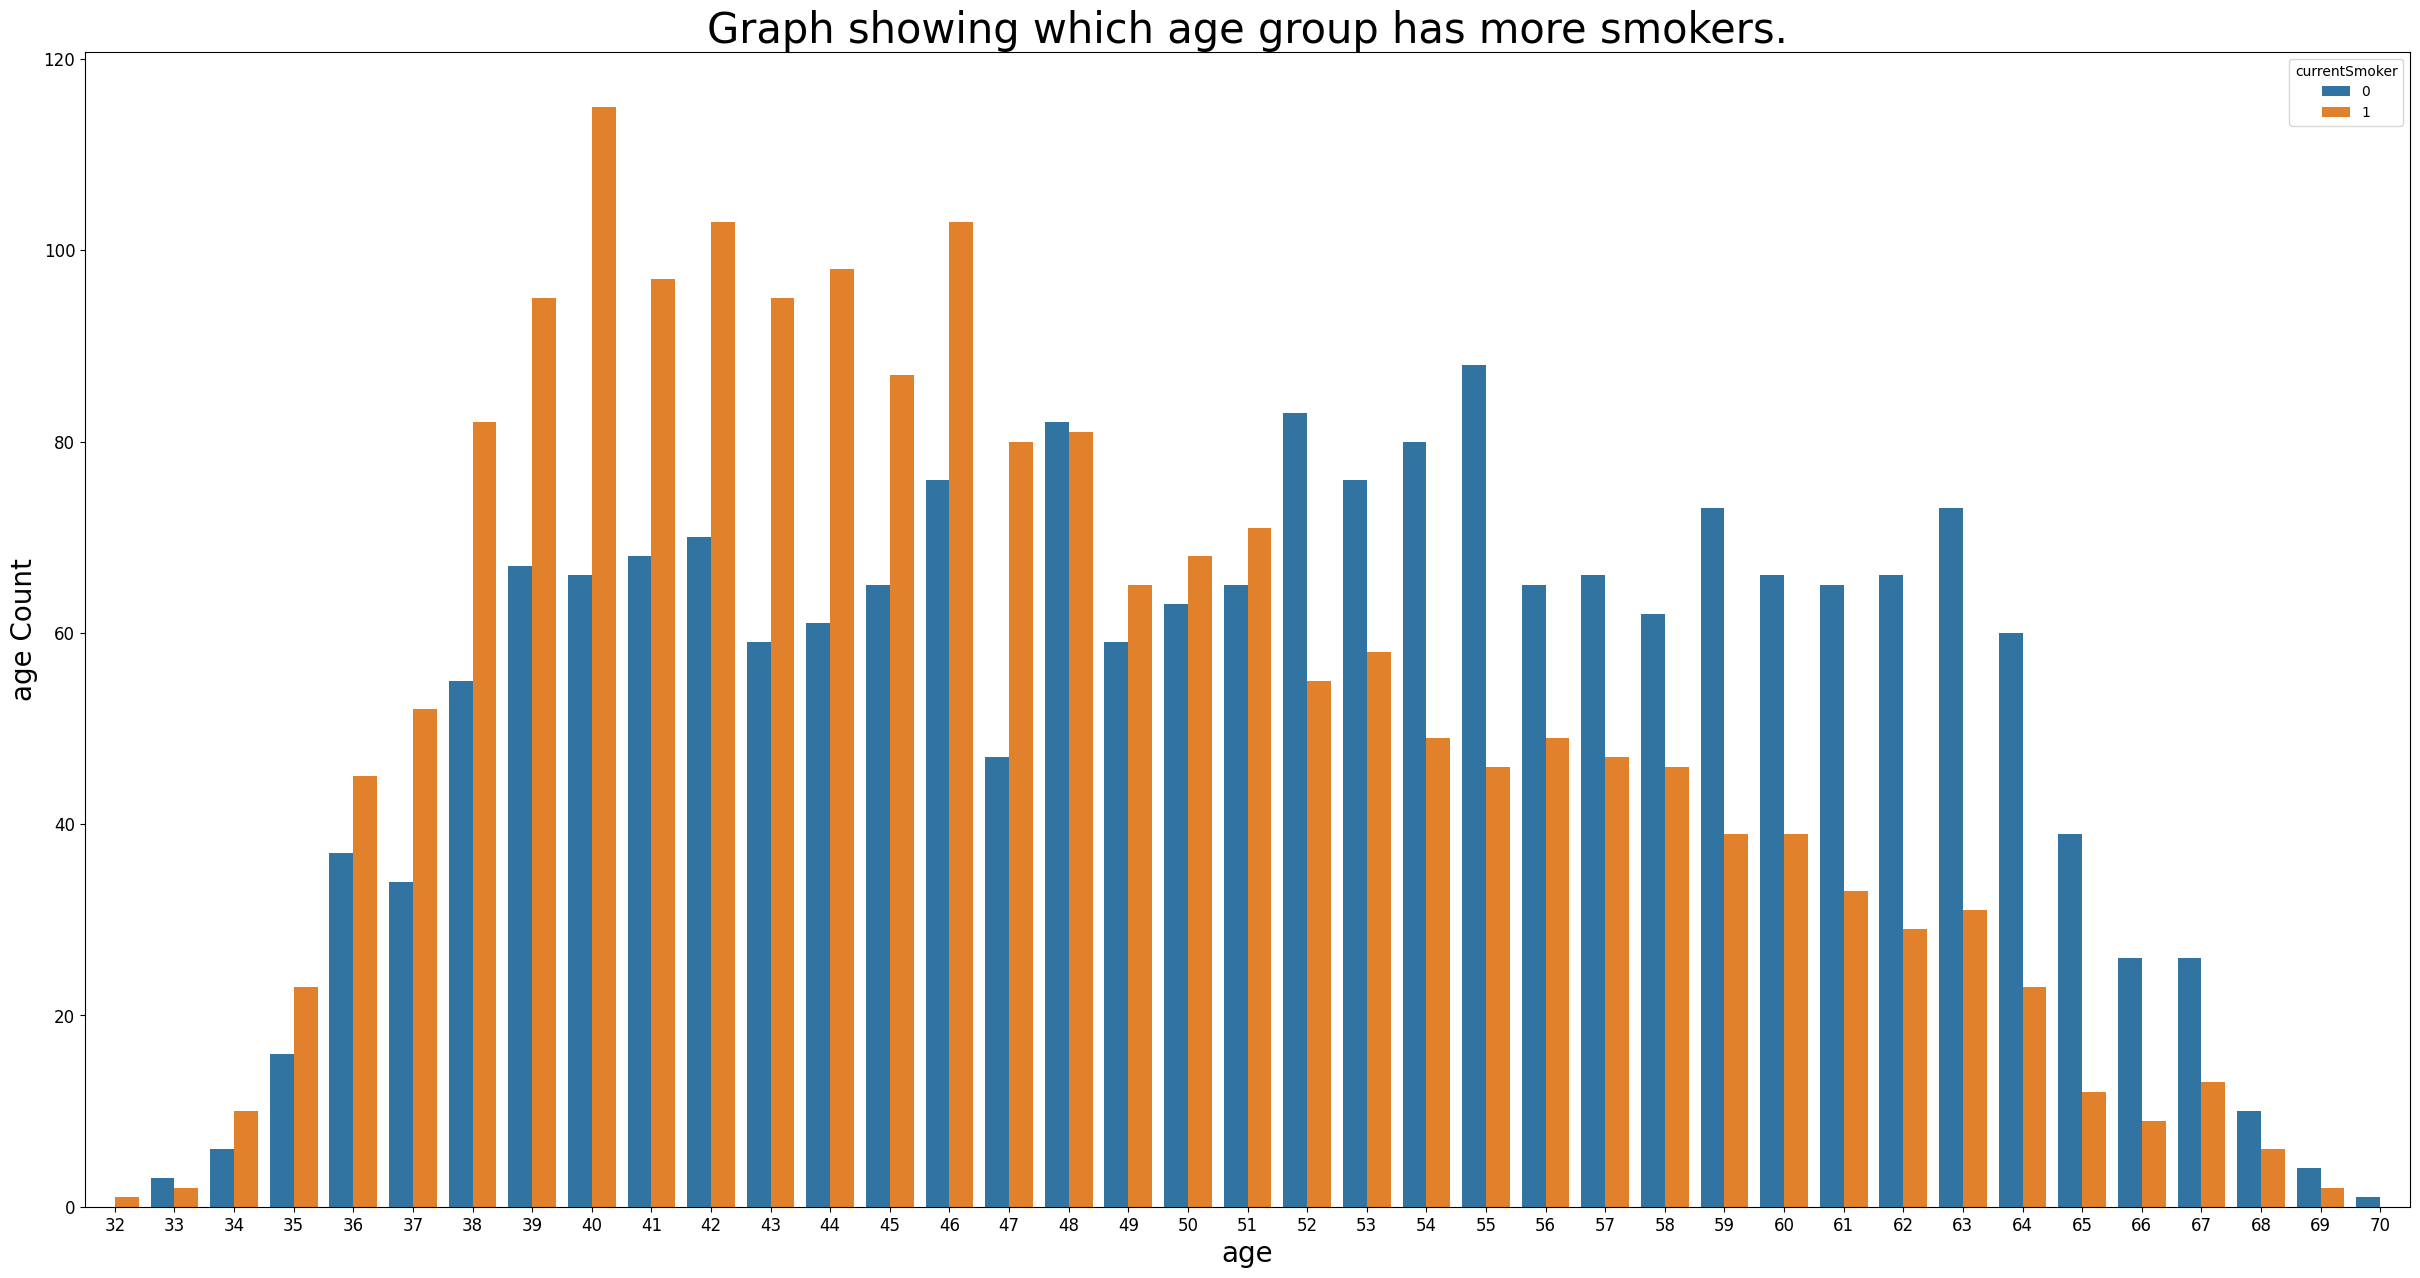

In [61]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="age",data=df,hue="currentSmoker")
plt.title("Graph showing which age group has more smokers.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("age Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* Mid-age groups ranging from the age of 38 - 46 have more number of `currentSmokers`
* No `currentSmokers` observed below the `age` of 32 
* maximum age for a `currentSmokers` is 70 

#### Relation between cigsPerDay and risk of coronary heart disease.

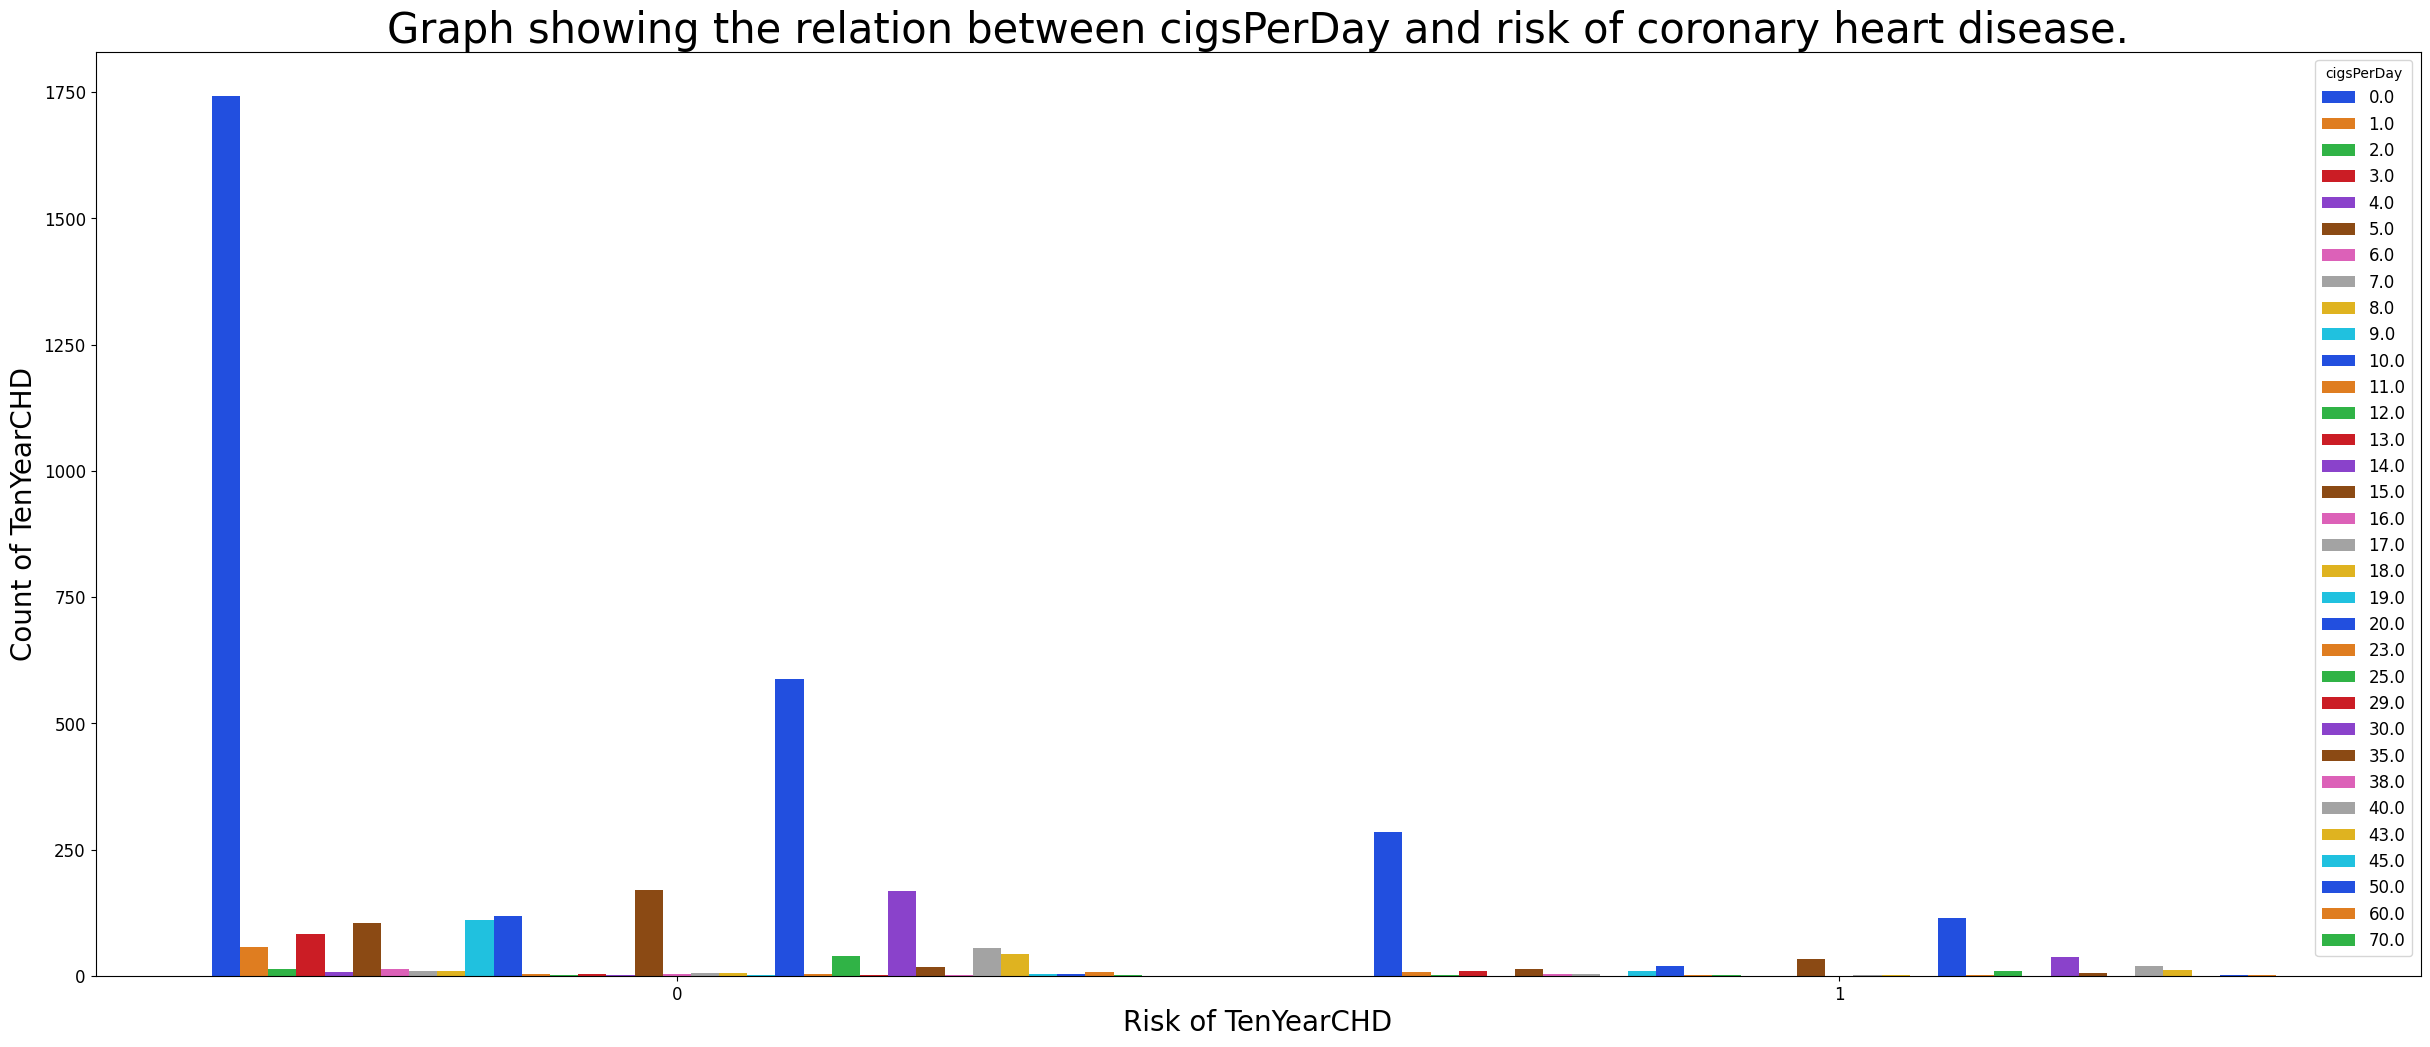

In [63]:
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="TenYearCHD",data=df,hue="cigsPerDay", palette = 'bright')
plt.legend(title='cigsPerDay', fontsize='large')
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease.", size=30)
plt.xlabel("Risk of TenYearCHD", size=20)
plt.ylabel("Count of TenYearCHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

* Low `cigsPerDay` comes with lower risk of CHD.
* Those who don't smoke, i.e., with a `cigsPerDay` of 0.0 has a really low risk of contracting the disease
* Although that is the case, low `cigsPerDay` doesn't actually guarantee a much lower risk of CHD

#### Relation between sysBP and risk of CHD.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160')])

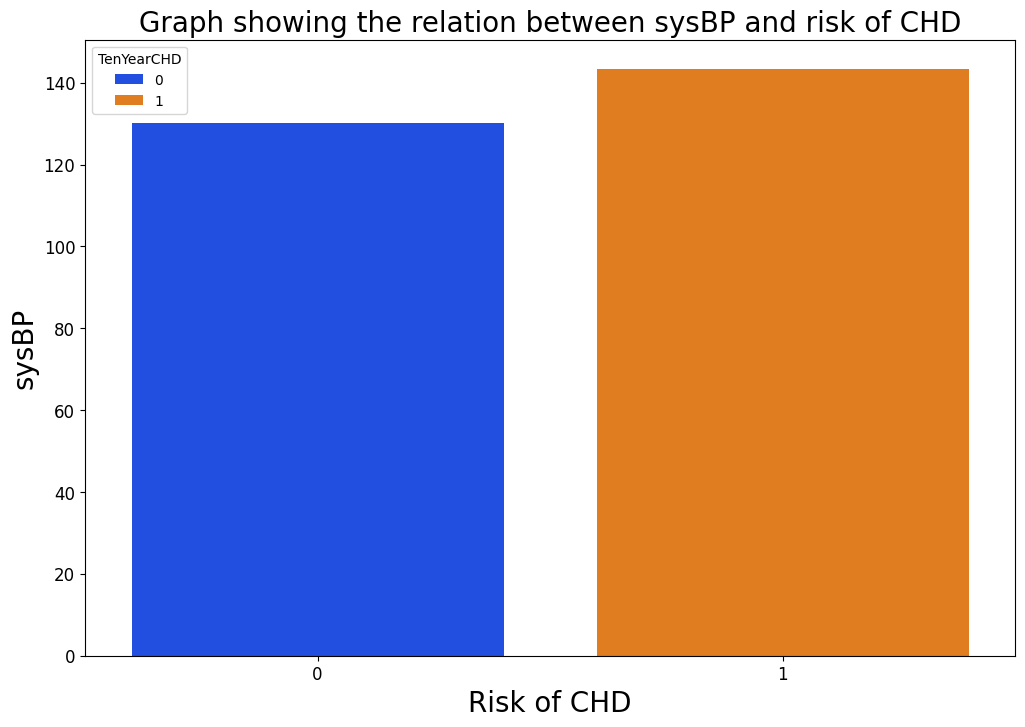

In [65]:
# Grouping up the data and ploting it

graph_3 = df.groupby("TenYearCHD", as_index=False).sysBP.mean()

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_3["TenYearCHD"], y=graph_3["sysBP"], hue = graph_3["TenYearCHD"], palette = 'bright')
plt.title("Graph showing the relation between sysBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("sysBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

(array([ 60.,  70.,  80.,  90., 100., 110., 120., 130., 140., 150.]),
 [Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80'),
  Text(0, 90.0, '90'),
  Text(0, 100.0, '100'),
  Text(0, 110.0, '110'),
  Text(0, 120.0, '120'),
  Text(0, 130.0, '130'),
  Text(0, 140.0, '140'),
  Text(0, 150.0, '150')])

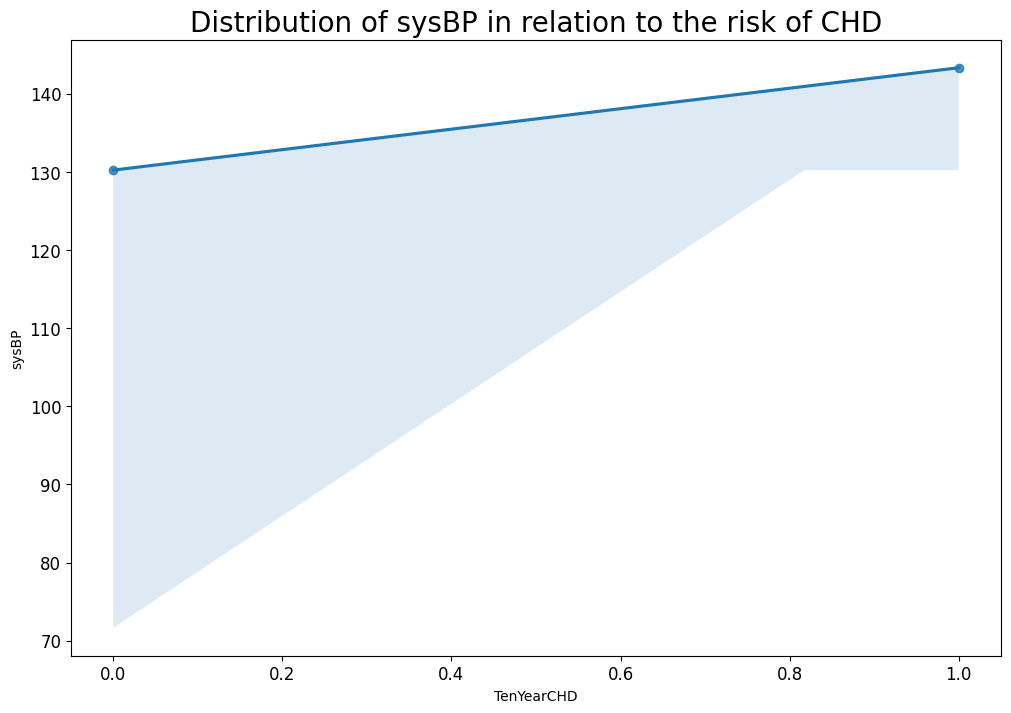

In [66]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_3["TenYearCHD"], y=graph_3["sysBP"])
plt.title("Distribution of sysBP in relation to the risk of CHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* Minor relation of higher risk of `TenYearCHD` found with higher `sysBP`
* Majority of people with `sysBP` ranging from 72 - 130 has lower chance of contracting the disease.

#### Relation between diaBP and risk of CHD

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100')])

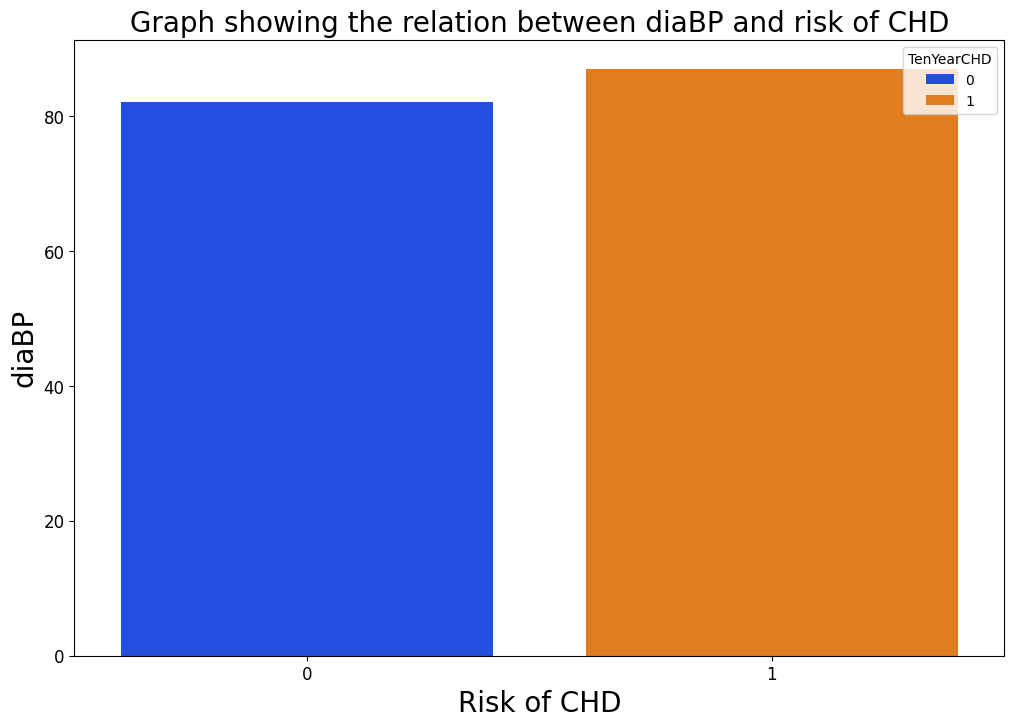

In [67]:
# Grouping up the data and ploting it

graph_4 = df.groupby("TenYearCHD", as_index=False).diaBP.mean()

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_4["TenYearCHD"], y=graph_4["diaBP"], hue=graph_4["TenYearCHD"], palette = 'bright')
plt.title("Graph showing the relation between diaBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("diaBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

(array([40., 50., 60., 70., 80., 90.]),
 [Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80'),
  Text(0, 90.0, '90')])

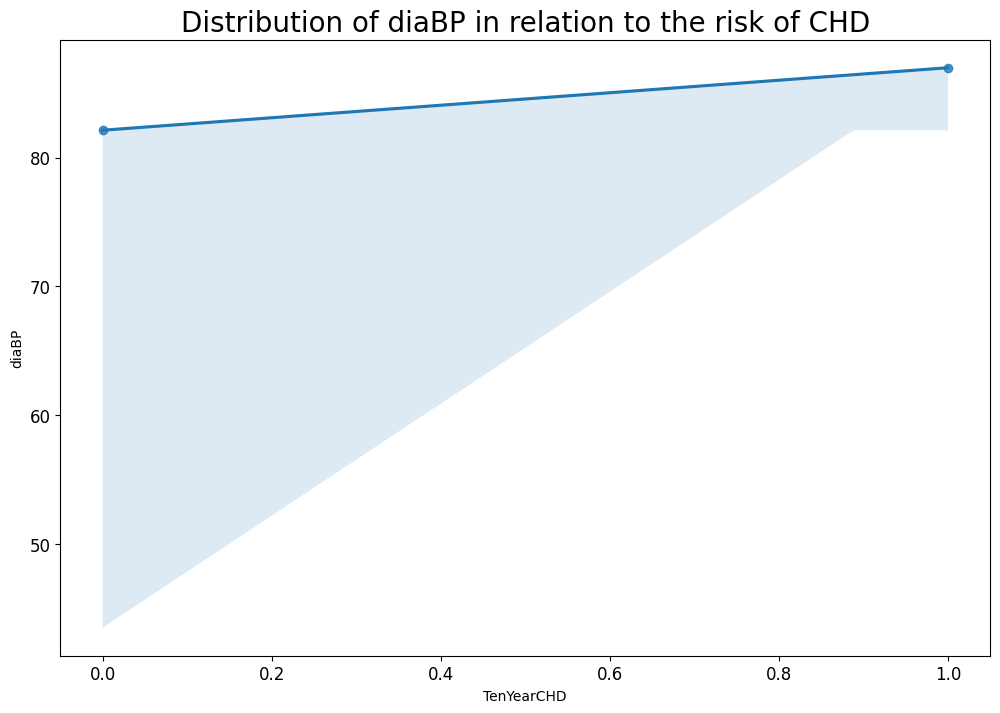

In [68]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_4["TenYearCHD"], y=graph_4["diaBP"])
plt.title("Distribution of diaBP in relation to the risk of CHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* Minor relation found between higher risk of `TenYearCHD` with higher `diaBP` similar to the previous one
* Majority of people with `diaBP` ranging upto 80.0 has lower chance of contracting the disease.

#### Relation between age and totChol

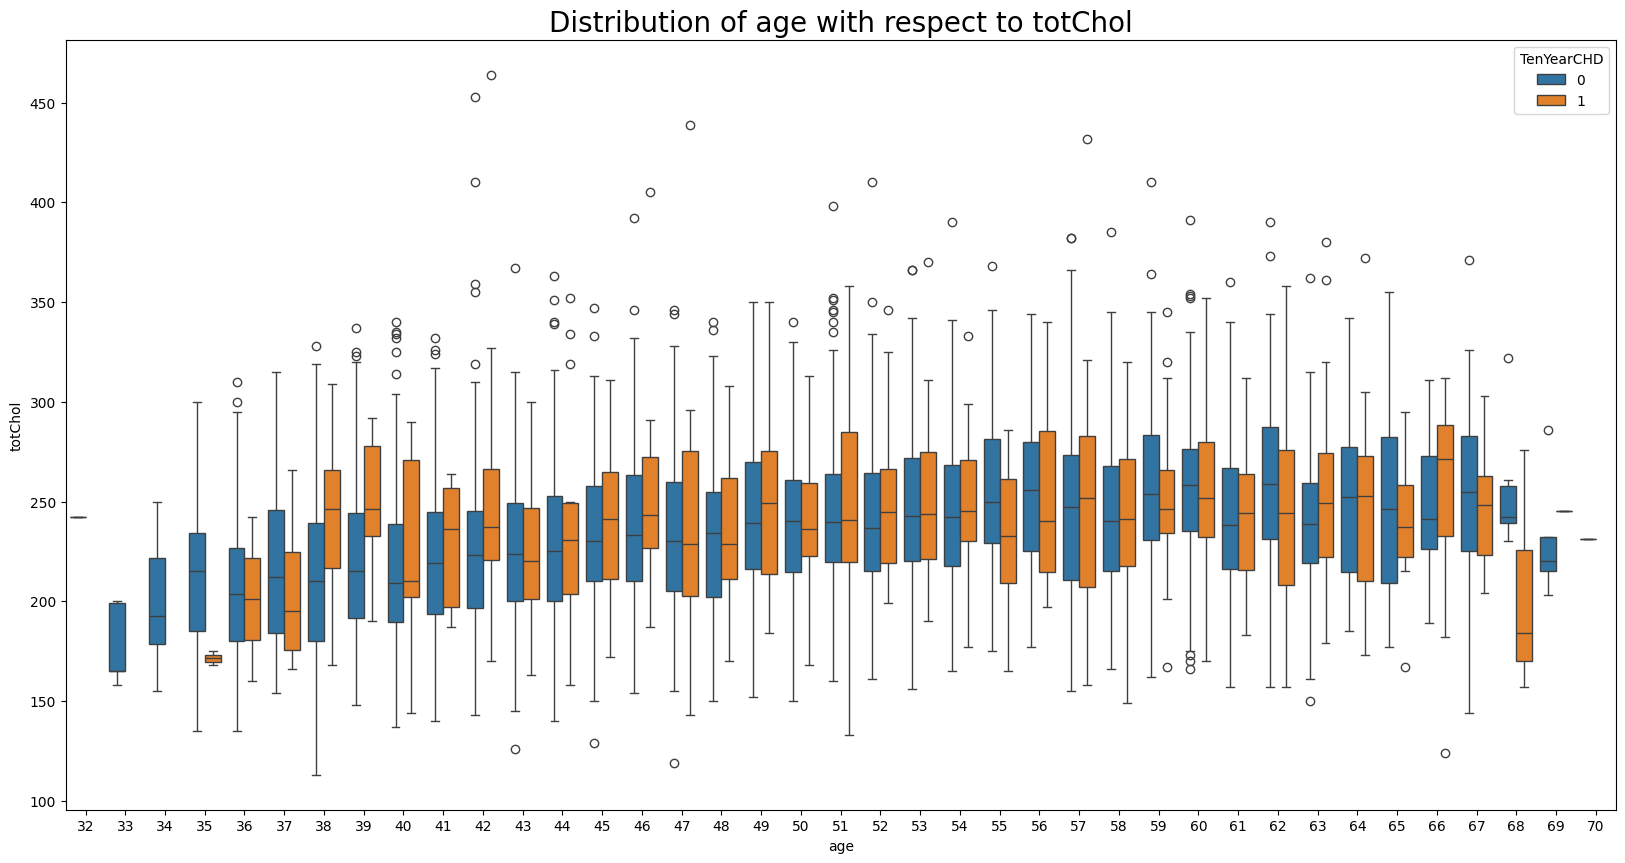

In [70]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(x="age",y="totChol",data=df, hue="TenYearCHD")
plt.title("Distribution of age with respect to totChol", size=20)
plt.show()

The boxplots are shifted in an upwardly manner suggesting that aged people have more cholesterol (bad cholesterol in general)

#### 3.3. Multivariate Analysis

##### Relationship between age and cigsPerDay, totChol, glucose.

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, -50.0, '−50'),
  Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300')])

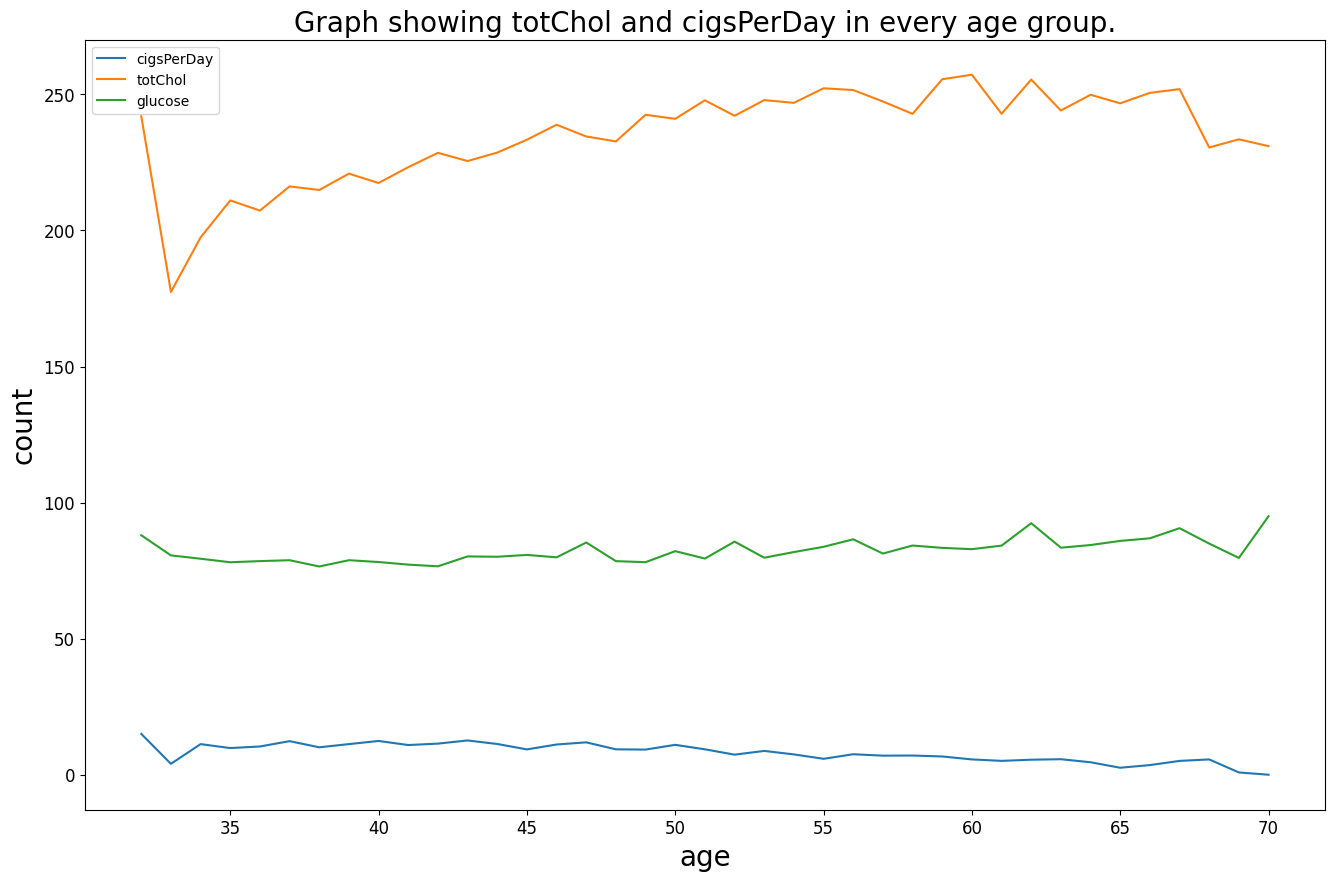

In [71]:
#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.

graph_5 = df.groupby("age").cigsPerDay.mean()
graph_6 = df.groupby("age").totChol.mean()
graph_7 = df.groupby("age").glucose.mean()

plt.figure(figsize=(16,10), facecolor='w')
sns.lineplot(data=graph_5, label="cigsPerDay")
sns.lineplot(data=graph_6, label="totChol")
sns.lineplot(data=graph_7, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.", size=20)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* There is a minor relation between `totChol` and `glucose`.
* `totChol` has a steep, linear and inverse graph for lower ranges of `age`
* `cigsPerDay` has a fairly parallel relationship with `age`

#### Distribution of sysBP vs diaBP with respect to currentSmoker and male attributes

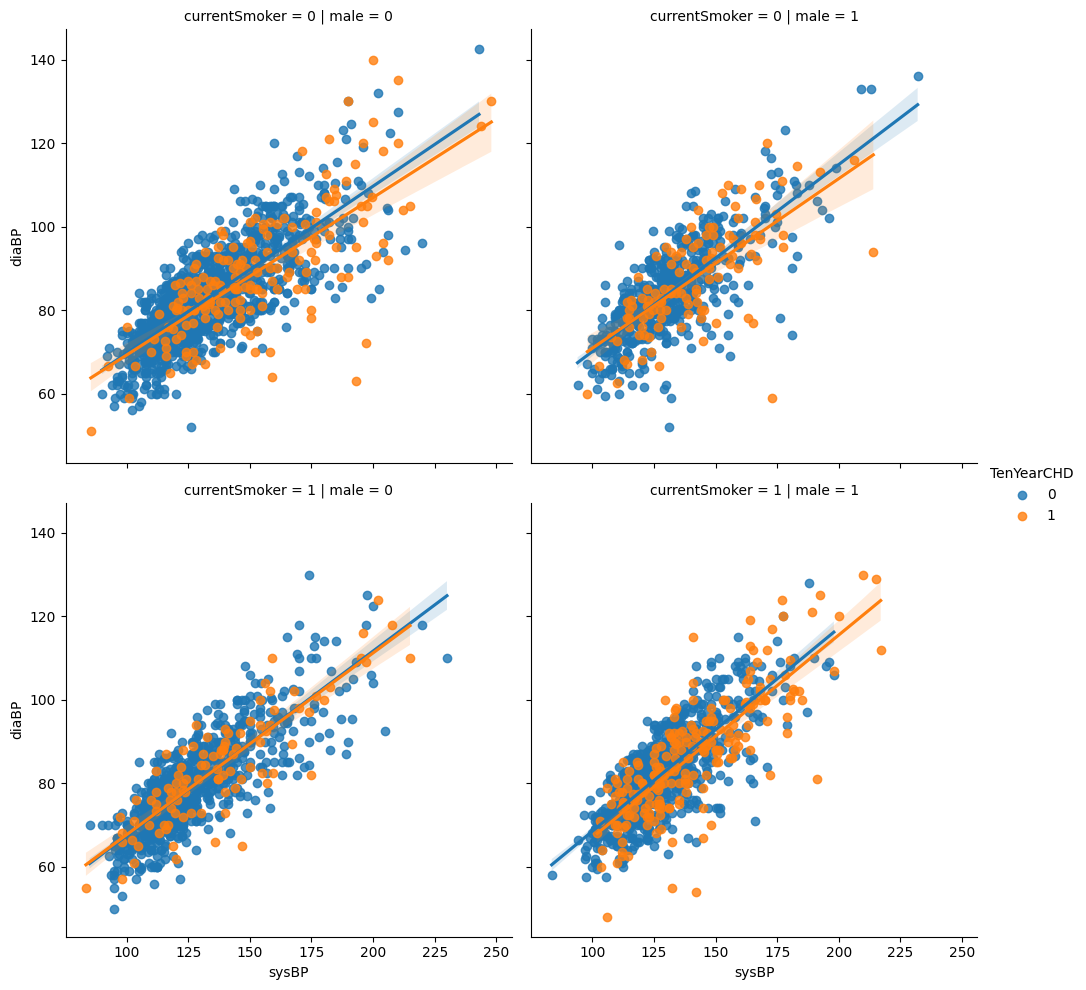

In [75]:
sns.lmplot(x='sysBP', y='diaBP', data=df, hue='TenYearCHD', col='male', row='currentSmoker')


The above graph plots the relationship between systolic blood pressure and diastolic blood pressure for patients based on their gender and whether they are current smokers or not and plots the best fit line

### 4. Resampling imbalanced dataset by oversampling positive cases

In [76]:
target1=df[df['TenYearCHD']==1]
target0=df[df['TenYearCHD']==0]

In [77]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)

In [78]:
target=pd.concat([target0,target1])

In [79]:
target['TenYearCHD'].value_counts()

TenYearCHD
0    3394
1    3394
Name: count, dtype: int64

In [80]:
data = target
np.shape(data)

(6788, 16)

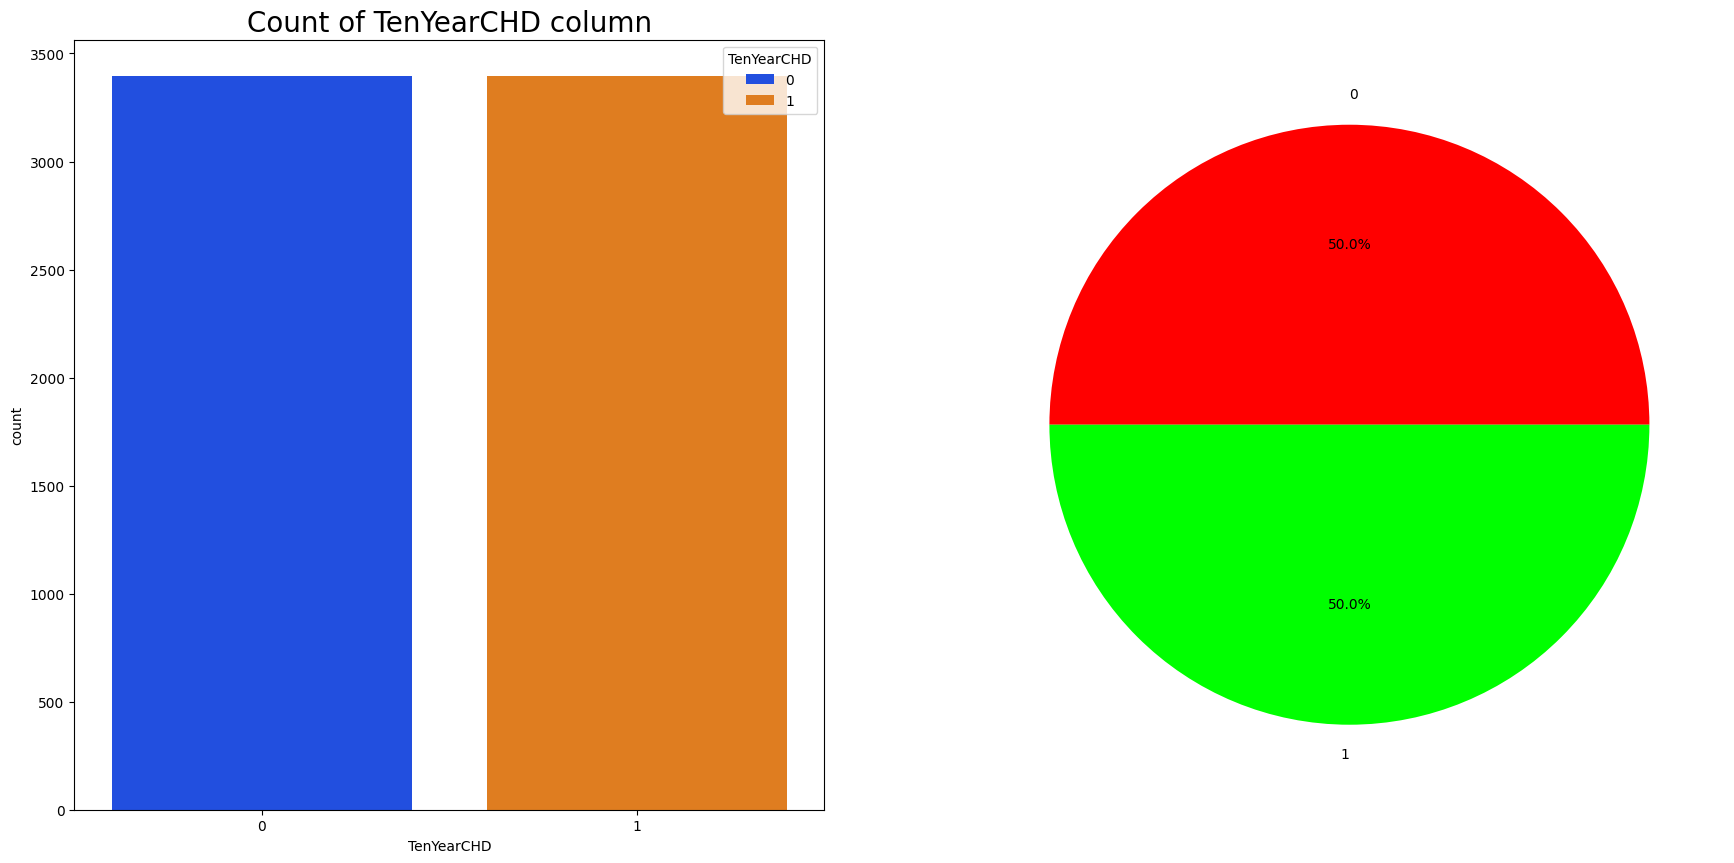

In [82]:
#Distribution of heart disease cases in the balanced dataset, the outcome variable
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=data, hue="TenYearCHD", palette="bright")
plt.title("Count of TenYearCHD column", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(data["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["red","lime"])
plt.show()

The number of positive and negative cases are equal. Hence the classes are now balanced for model fitting

### 5. Feature Selection


In [83]:
#To idenfify the features that have larger contribution towards the outcome variable, TenYearCHD
X=data.iloc[:,0:15]
y=data.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (6788, 15) 
y -  (6788,)


In [84]:
#Apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=10)

In [85]:
fit=best.fit(X,y)

In [87]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [88]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

         Feature    Score
10         sysBP 2121.922
14       glucose 1232.342
1            age 1006.483
4     cigsPerDay  788.789
9        totChol  769.066
11         diaBP  486.663
7   prevalentHyp  221.105
0           male   66.776
5         BPMeds   66.216
8       diabetes   54.258
12           BMI   44.718


In [89]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

         Feature    Score
10         sysBP 2121.922
14       glucose 1232.342
1            age 1006.483
4     cigsPerDay  788.789
9        totChol  769.066
11         diaBP  486.663
7   prevalentHyp  221.105
0           male   66.776
5         BPMeds   66.216
8       diabetes   54.258
12           BMI   44.718


In [90]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

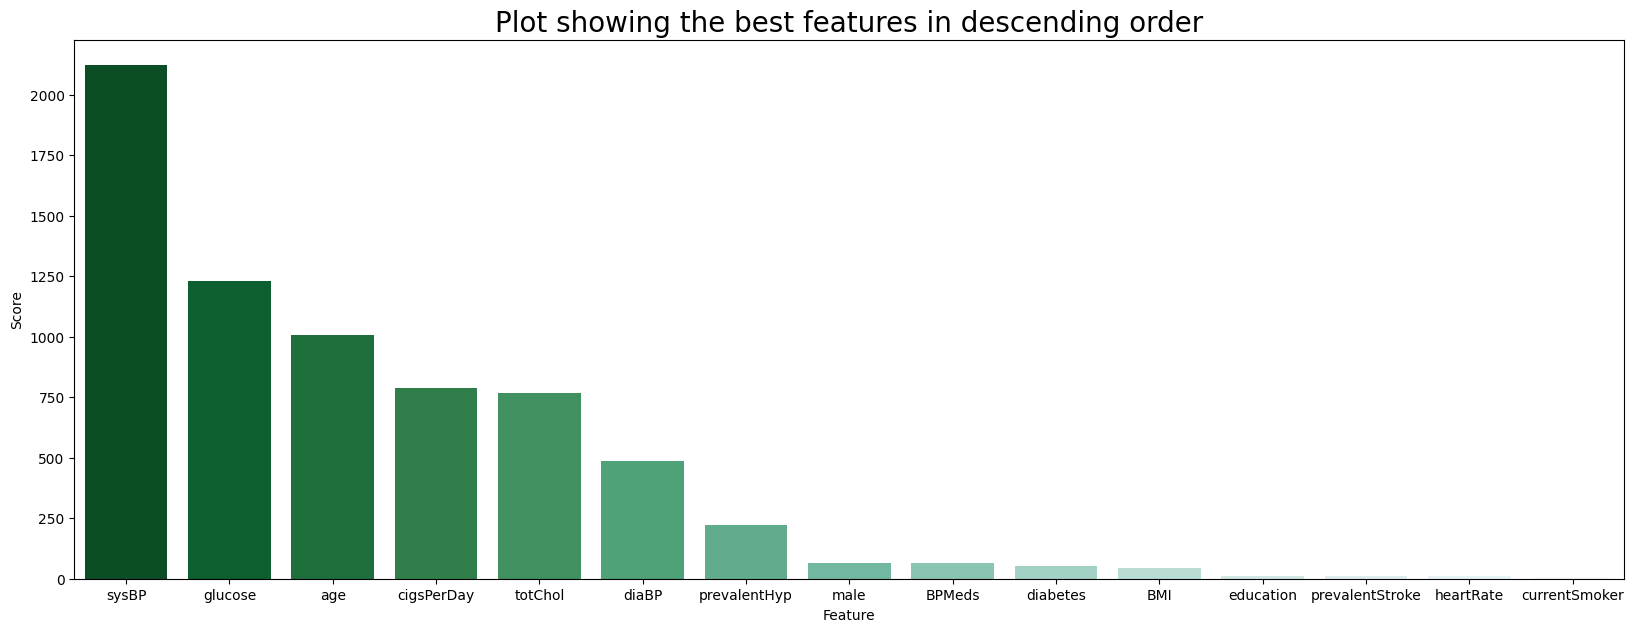

In [92]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,hue='Feature', palette='BuGn_r')
plt.title("Plot showing the best features in descending order", size=20)
plt.show()

This plot shows the `Features` and their respective `chi-square test` scores

In [93]:
#Select 10 features
features=scores["Feature"].tolist()[:10]
features

['sysBP',
 'glucose',
 'age',
 'cigsPerDay',
 'totChol',
 'diaBP',
 'prevalentHyp',
 'male',
 'BPMeds',
 'diabetes']

Only these features have strongest influence over the target variable. They are, in particular order:
* sysBP
* glucose
* age
* cigsPerDay
* totChol
* diaBP
* prevalentHyp
* male
* BPMeds
* diabetes


In [94]:
data=data[['sysBP','glucose','age','cigsPerDay','totChol','diaBP','prevalentHyp','male','BPMeds','diabetes','TenYearCHD']]
data.head()

,sysBP,glucose,age,cigsPerDay,totChol,diaBP,prevalentHyp,male,BPMeds,diabetes,TenYearCHD
0,106.000,77.000,39,0.000,195.000,70.000,0,1,0.000,0,0
1,121.000,76.000,46,0.000,250.000,81.000,0,0,0.000,0,0
2,127.500,70.000,48,20.000,245.000,80.000,0,1,0.000,0,0
4,130.000,85.000,46,23.000,285.000,84.000,0,0,0.000,0,0
5,180.000,99.000,43,0.000,228.000,110.000,1,0,0.000,0,0


### 6. Feature Splitting and Scaling

In [95]:
y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [96]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

### 7. Predictive Modeling

We use the following different machine learning models for the dataset:

1. Logistic Regressor
2. K-Nearest Neighbour Classifier
3. Random Forest Classifier
4. Decision Tree Classifier
5. Gradient Boosting Classifier

In [103]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confussion matrix
[[881 471]
 [411 953]]


Accuracy of Logistic Regression: 67.5257731958763 

              precision    recall  f1-score   support

           0       0.68      0.65      0.67      1352
           1       0.67      0.70      0.68      1364

    accuracy                           0.68      2716
   macro avg       0.68      0.68      0.68      2716
weighted avg       0.68      0.68      0.68      2716



In [104]:
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
knn_conf_matrix = confusion_matrix(test_y, knn_predict)
knn_acc_score = accuracy_score(test_y, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(test_y, knn_predict))

confussion matrix
[[1106  246]
 [  26 1338]]


Accuracy of k-NN Classification: 89.98527245949927 

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      1352
           1       0.84      0.98      0.91      1364

    accuracy                           0.90      2716
   macro avg       0.91      0.90      0.90      2716
weighted avg       0.91      0.90      0.90      2716



In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confussion matrix
[[1140  212]
 [  49 1315]]


Accuracy of Random Forest: 90.39027982326951 

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1352
           1       0.86      0.96      0.91      1364

    accuracy                           0.90      2716
   macro avg       0.91      0.90      0.90      2716
weighted avg       0.91      0.90      0.90      2716



In [105]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_acc_score = accuracy_score(test_y, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y,dt_predicted))

confussion matrix
[[1075  277]
 [  31 1333]]


Accuracy of DecisionTreeClassifier: 88.65979381443299 

              precision    recall  f1-score   support

           0       0.97      0.80      0.87      1352
           1       0.83      0.98      0.90      1364

    accuracy                           0.89      2716
   macro avg       0.90      0.89      0.89      2716
weighted avg       0.90      0.89      0.89      2716



In [106]:
m5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(train_x,train_y)
gvc_predicted = gvc.predict(test_x)
gvc_conf_matrix = confusion_matrix(test_y, gvc_predicted)
gvc_acc_score = accuracy_score(test_y, gvc_predicted)
print("confussion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(test_y,gvc_predicted))

confussion matrix
[[ 913  439]
 [ 337 1027]]


Accuracy of Gradient Boosting Classifier: 71.42857142857143 

              precision    recall  f1-score   support

           0       0.73      0.68      0.70      1352
           1       0.70      0.75      0.73      1364

    accuracy                           0.71      2716
   macro avg       0.72      0.71      0.71      2716
weighted avg       0.72      0.71      0.71      2716



#### 7.1. Hyperparameter Tuning for best Classifier
#### Using Randomized Search Cross Validation

### Random Forest Classifier

In [107]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [108]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=7, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(train_x,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
129 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=7, verbose=2)

In [110]:
rf_hyper = rf_random.best_estimator_
rf_hyper.fit(train_x,train_y)
print("Accuracy on training set is : {}".format(rf_hyper.score(train_x,train_y)))
print("Accuracy on validation set is : {}".format(rf_hyper.score(test_x, test_y)))
rf_predicted = rf_hyper.predict(test_x)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("Accuracy of Hyper-tuned Random Forest Classifier:",rf_acc_score*100,'\n')
print(classification_report(test_y, rf_predicted))

Accuracy on training set is : 1.0
Accuracy on validation set is : 0.9565537555228277
Accuracy of Hyper-tuned Random Forest Classifier: 95.65537555228278 

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1352
           1       0.94      0.98      0.96      1364

    accuracy                           0.96      2716
   macro avg       0.96      0.96      0.96      2716
weighted avg       0.96      0.96      0.96      2716



### Gradient Boosting Classifier

In [111]:
#Number of trees
n_estimators = [int(i) for i in np.linspace(start=100,stop=1000,num=10)]
#Number of features to consider at every split
max_features = ['auto','sqrt']
#Maximum number of levels in tree
max_depth = [int(i) for i in np.linspace(10, 100, num=10)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split=[2,5,10]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [112]:
gb=GradientBoostingClassifier(random_state=0)
#Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=random_grid,
                              n_iter=100, scoring='f1', 
                              cv=3, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
gb_random.fit(train_x,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
132 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=0, return_train_score=True, scoring='f1',
                   verbose=2)

In [113]:
gb_hyper = gb_random.best_estimator_
gb_hyper.fit(train_x,train_y)
print("Accuracy on training set is : {}".format(gb_hyper.score(train_x,train_y)))
print("Accuracy on validation set is : {}".format(gb_hyper.score(test_x, test_y)))
gbc_predicted = gb_hyper.predict(test_x)
gbc_acc_score = accuracy_score(test_y, gbc_predicted)
print("Accuracy of Hyper-tuned Gradient Boosting Classifier:",gbc_acc_score*100,'\n')
print(classification_report(test_y, gbc_predicted))

Accuracy on training set is : 1.0
Accuracy on validation set is : 0.9550810014727541
Accuracy of Hyper-tuned Gradient Boosting Classifier: 95.50810014727541 

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1352
           1       0.94      0.98      0.96      1364

    accuracy                           0.96      2716
   macro avg       0.96      0.95      0.96      2716
weighted avg       0.96      0.96      0.96      2716



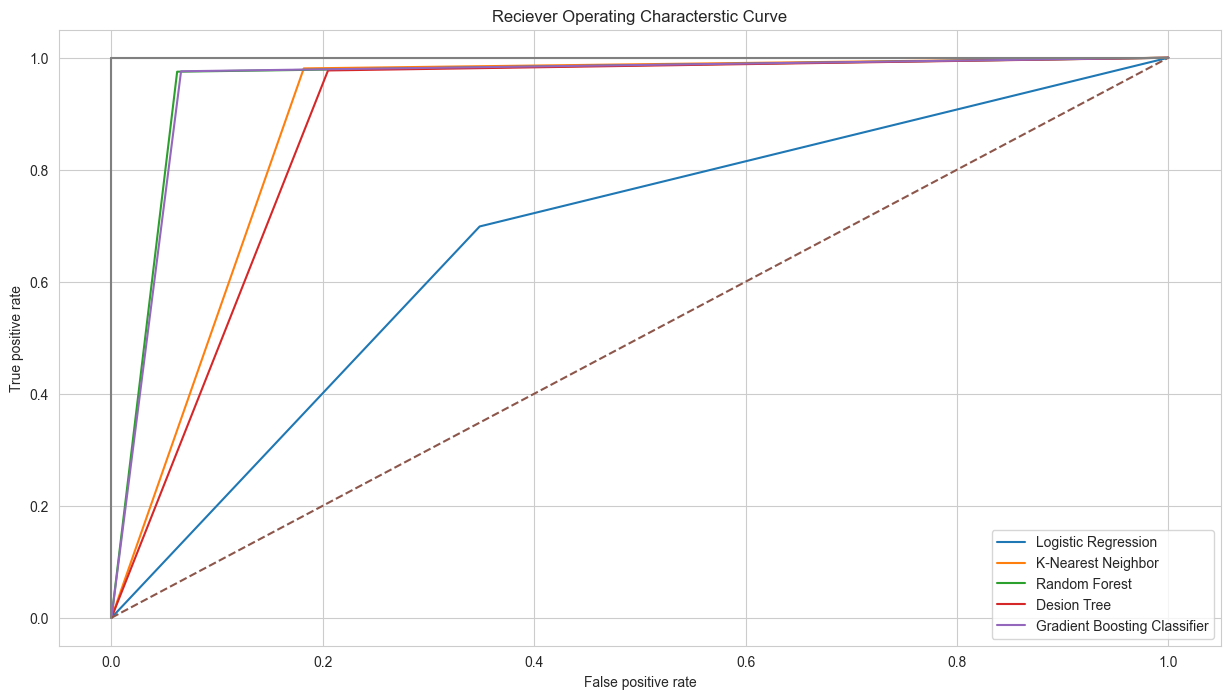

In [114]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(test_y,lr_predict)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(test_y,knn_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(test_y,rf_predicted)                                                             
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(test_y,dt_predicted)
gbc_false_positive_rate,gbc_true_positive_rate,gbc_threshold = roc_curve(test_y,gbc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(15,8), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(gbc_false_positive_rate,gbc_true_positive_rate,label='Gradient Boosting Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# **Model Evaluation**

In [115]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','Random Forest',
                                   'Decision Tree','Gradient Boosting'], 'Accuracy': [lr_acc_score*100, knn_acc_score*100, 
                                                                                      rf_acc_score*100, dt_acc_score*100,gbc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,67.526
1,K-Nearest Neighbour,89.985
2,Random Forest,95.655
3,Decision Tree,88.660
4,Gradient Boosting,95.508


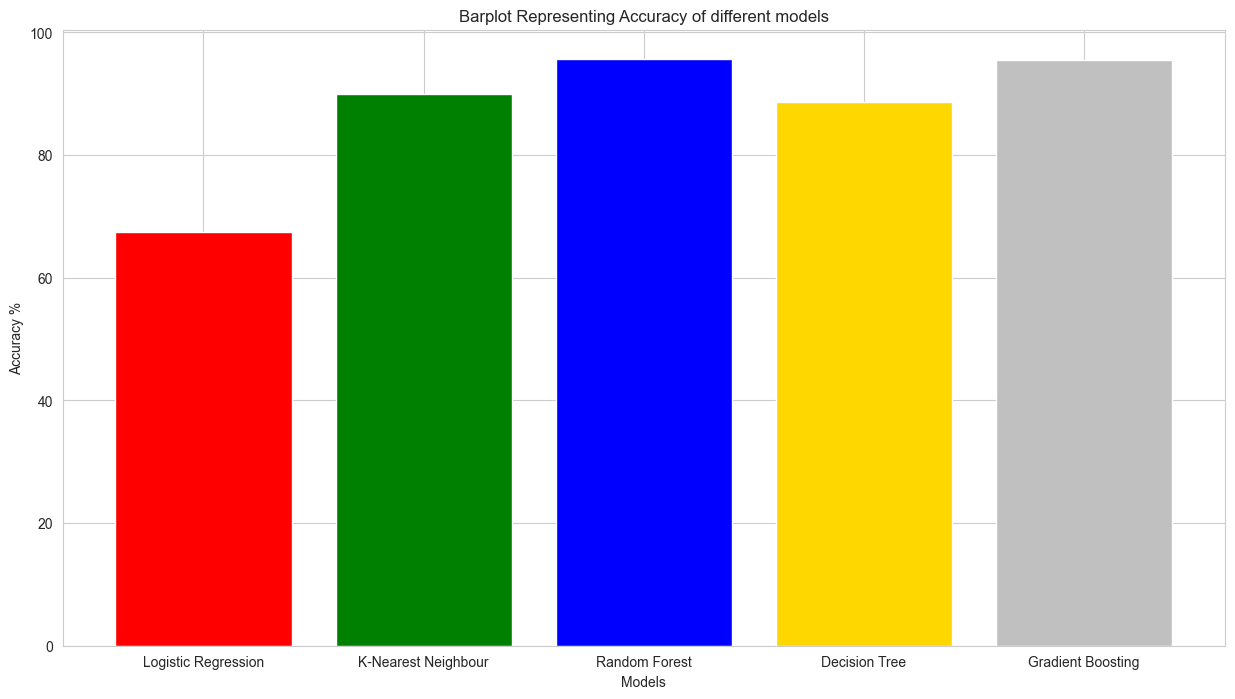

In [116]:
colors = ['red','green','blue','gold','silver']
plt.figure(figsize=(15,8), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

# Ensembling

In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.

In [118]:
gbc_hyper = GradientBoostingClassifier()  # Define gbc_hyper variable
gbc_hyper.fit(train_x, train_y)  # Fit the model
scv = StackingCVClassifier(classifiers=[rf_hyper, gbc_hyper, knn], meta_classifier=rf)  # Use gbc_hyper in StackingCVClassifier
scv=StackingCVClassifier(classifiers=[rf_hyper, gbc_hyper, knn], meta_classifier= rf)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)
scv.fit(train_x.values,train_y.values)
scv_predicted = scv.predict(test_x)
scv_conf_matrix = confusion_matrix(test_y, scv_predicted)
scv_acc_score = accuracy_score(test_y, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(test_y,scv_predicted))

c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


confussion matrix
[[1268   84]
 [  35 1329]]


Accuracy of StackingCVClassifier: 95.61855670103093 

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1352
           1       0.94      0.97      0.96      1364

    accuracy                           0.96      2716
   macro avg       0.96      0.96      0.96      2716
weighted avg       0.96      0.96      0.96      2716

